# **Weapon Detection**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Installing** **YoloV8**

In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 64.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 102.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 84.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 57.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 15.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 79.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling

In [ ]:
!cp /content/drive/MyDrive/final.v1i.yolov8.zip /content/

!unzip -q /content/final.v1i.yolov8.zip -d /content/final_dataset


In [ ]:
dataset_path = '/content/drive/MyDrive/final.v1i.yolov8/data.yaml'

In [ ]:
!ls /content/final_dataset

data.yaml  README.dataset.txt  README.roboflow.txt  test  train  valid


In [ ]:
yaml_text = """train: /content/final_dataset/train/images
val: /content/final_dataset/valid/images
test: /content/final_dataset/test/images
nc: 4
names: ['knife', 'gun', 'axe', 'stick-bat']
"""

with open("/content/data.yaml", "w") as f:
    f.write(yaml_text)


# **Training with custom dataset**

In [ ]:
from ultralytics import YOLO

model = YOLO("yolov8s.pt")
model.train(data="/content/data.yaml", epochs=25, imgsz=640)

Ultralytics 8.3.123 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/data.yaml, epochs=25, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train5, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width=None, f

100%|██████████| 755k/755k [00:00<00:00, 89.7MB/s]

Overriding model.yaml nc=80 with nc=4

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.block.C2f             [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytics

Model summary: 129 layers, 11,137,148 parameters, 11,137,132 gradients, 28.7 GFLOPs

Transferred 349/355 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...


100%|██████████| 5.35M/5.35M [00:00<00:00, 269MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 755.6±241.8 MB/s, size: 45.2 KB)


train: Scanning /content/final_dataset/train/labels... 1501 images, 1 backgrounds, 0 corrupt: 100%|██████████| 1501/1501 [00:00<00:00, 2022.80it/s]

train: New cache created: /content/final_dataset/train/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 236, len(boxes) = 1959. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 800.0±404.2 MB/s, size: 42.5 KB)


val: Scanning /content/final_dataset/valid/labels... 415 images, 1 backgrounds, 0 corrupt: 100%|██████████| 415/415 [00:00<00:00, 1572.31it/s]

val: New cache created: /content/final_dataset/valid/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 41, len(boxes) = 560. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


Plotting labels to runs/detect/train5/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train5
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25      3.69G      1.591      3.013      1.758         34        640: 100%|██████████| 94/94 [00:31<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.21it/s]

                   all        415        560      0.267      0.234      0.161     0.0637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      4.48G      1.669      2.463      1.813         23        640: 100%|██████████| 94/94 [00:28<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  3.24it/s]

                   all        415        560      0.124      0.175     0.0643     0.0189



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25      4.52G        1.8       2.67      1.936         28        640: 100%|██████████| 94/94 [00:29<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.82it/s]

                   all        415        560      0.162      0.291      0.125     0.0518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25      4.56G      1.826      2.641      1.979         27        640: 100%|██████████| 94/94 [00:29<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.86it/s]

                   all        415        560      0.183      0.182     0.0871     0.0241



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25      4.59G      1.739      2.534       1.92         38        640: 100%|██████████| 94/94 [00:28<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.30it/s]

                   all        415        560      0.245      0.285      0.189     0.0761



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25      4.63G      1.675       2.44      1.872         37        640: 100%|██████████| 94/94 [00:28<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.58it/s]

                   all        415        560      0.288      0.358      0.243      0.108



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25      4.66G      1.606      2.296       1.81         32        640: 100%|██████████| 94/94 [00:28<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  3.24it/s]

                   all        415        560      0.294      0.344       0.24      0.107



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25       4.7G      1.599       2.24      1.781         25        640: 100%|██████████| 94/94 [00:28<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.31it/s]

                   all        415        560      0.455      0.402      0.394        0.2



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25      4.74G       1.59      2.207      1.771         31        640: 100%|██████████| 94/94 [00:28<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.53it/s]

                   all        415        560      0.468       0.48      0.457      0.222



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25      4.77G       1.51       2.09      1.702         36        640: 100%|██████████| 94/94 [00:29<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  3.25it/s]

                   all        415        560      0.536      0.415      0.476      0.247



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25      4.81G      1.483      2.016      1.686         37        640: 100%|██████████| 94/94 [00:28<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  3.09it/s]

                   all        415        560      0.572      0.558      0.563      0.304



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25      4.85G      1.425      1.902      1.637         32        640: 100%|██████████| 94/94 [00:27<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.73it/s]

                   all        415        560      0.612      0.523      0.565      0.313



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25      4.88G      1.409       1.81      1.619         23        640: 100%|██████████| 94/94 [00:28<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.33it/s]

                   all        415        560      0.657      0.562      0.621      0.338



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25      4.92G      1.374      1.771      1.607         37        640: 100%|██████████| 94/94 [00:28<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.98it/s]

                   all        415        560      0.725      0.573      0.639      0.354



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25      4.96G      1.333      1.709      1.586         39        640: 100%|██████████| 94/94 [00:28<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.64it/s]

                   all        415        560      0.642       0.61      0.649      0.396


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25      4.99G      1.409      1.588      1.691         15        640: 100%|██████████| 94/94 [00:28<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.27it/s]

                   all        415        560      0.648      0.596      0.659      0.387



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25      5.03G      1.307      1.387      1.618         18        640: 100%|██████████| 94/94 [00:27<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.86it/s]

                   all        415        560      0.694      0.595      0.676       0.41



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25      5.06G      1.288      1.319      1.595         13        640: 100%|██████████| 94/94 [00:27<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.78it/s]

                   all        415        560       0.76      0.612      0.703      0.422



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25       5.1G      1.232      1.258      1.542         14        640: 100%|██████████| 94/94 [00:27<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.33it/s]

                   all        415        560      0.738      0.656      0.724      0.449



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25      5.14G      1.201      1.191      1.519         17        640: 100%|██████████| 94/94 [00:27<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.35it/s]

                   all        415        560      0.799      0.659      0.749       0.45



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25      5.17G       1.15       1.13      1.469         13        640: 100%|██████████| 94/94 [00:27<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.66it/s]

                   all        415        560      0.755      0.715      0.779      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25      5.21G      1.125      1.074      1.446         16        640: 100%|██████████| 94/94 [00:27<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.90it/s]

                   all        415        560      0.775      0.693      0.771      0.495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25      5.25G      1.087      1.006      1.417         14        640: 100%|██████████| 94/94 [00:27<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.28it/s]

                   all        415        560      0.843      0.683      0.793      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25      5.29G      1.056     0.9621      1.386         16        640: 100%|██████████| 94/94 [00:27<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  3.16it/s]

                   all        415        560      0.857      0.675      0.798      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25      5.32G      1.026     0.9304       1.37         15        640: 100%|██████████| 94/94 [00:27<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.62it/s]

                   all        415        560      0.817      0.712      0.796      0.526



25 epochs completed in 0.232 hours.
Optimizer stripped from runs/detect/train5/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/train5/weights/best.pt, 22.5MB

Validating runs/detect/train5/weights/best.pt...
Ultralytics 8.3.123 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,127,132 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.32it/s]


                   all        415        560      0.819      0.712      0.796      0.526
                 knife        136        189      0.809      0.624      0.725      0.457
                   gun        129        160       0.83      0.681      0.793       0.55
                   axe         36         37       0.81      0.865      0.925      0.672
             stick-bat        113        174      0.825      0.677      0.742      0.424
Speed: 0.2ms preprocess, 4.6ms inference, 0.0ms loss, 3.2ms postprocess per image
Results saved to runs/detect/train5


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x787e54131590>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0

In [ ]:
!cp runs/detect/train5/weights/best.pt /content/drive/MyDrive/best.pt

In [ ]:
!cp -r runs/detect/train5 /content/drive/MyDrive/yolo_training_logs/

# **Traning result**

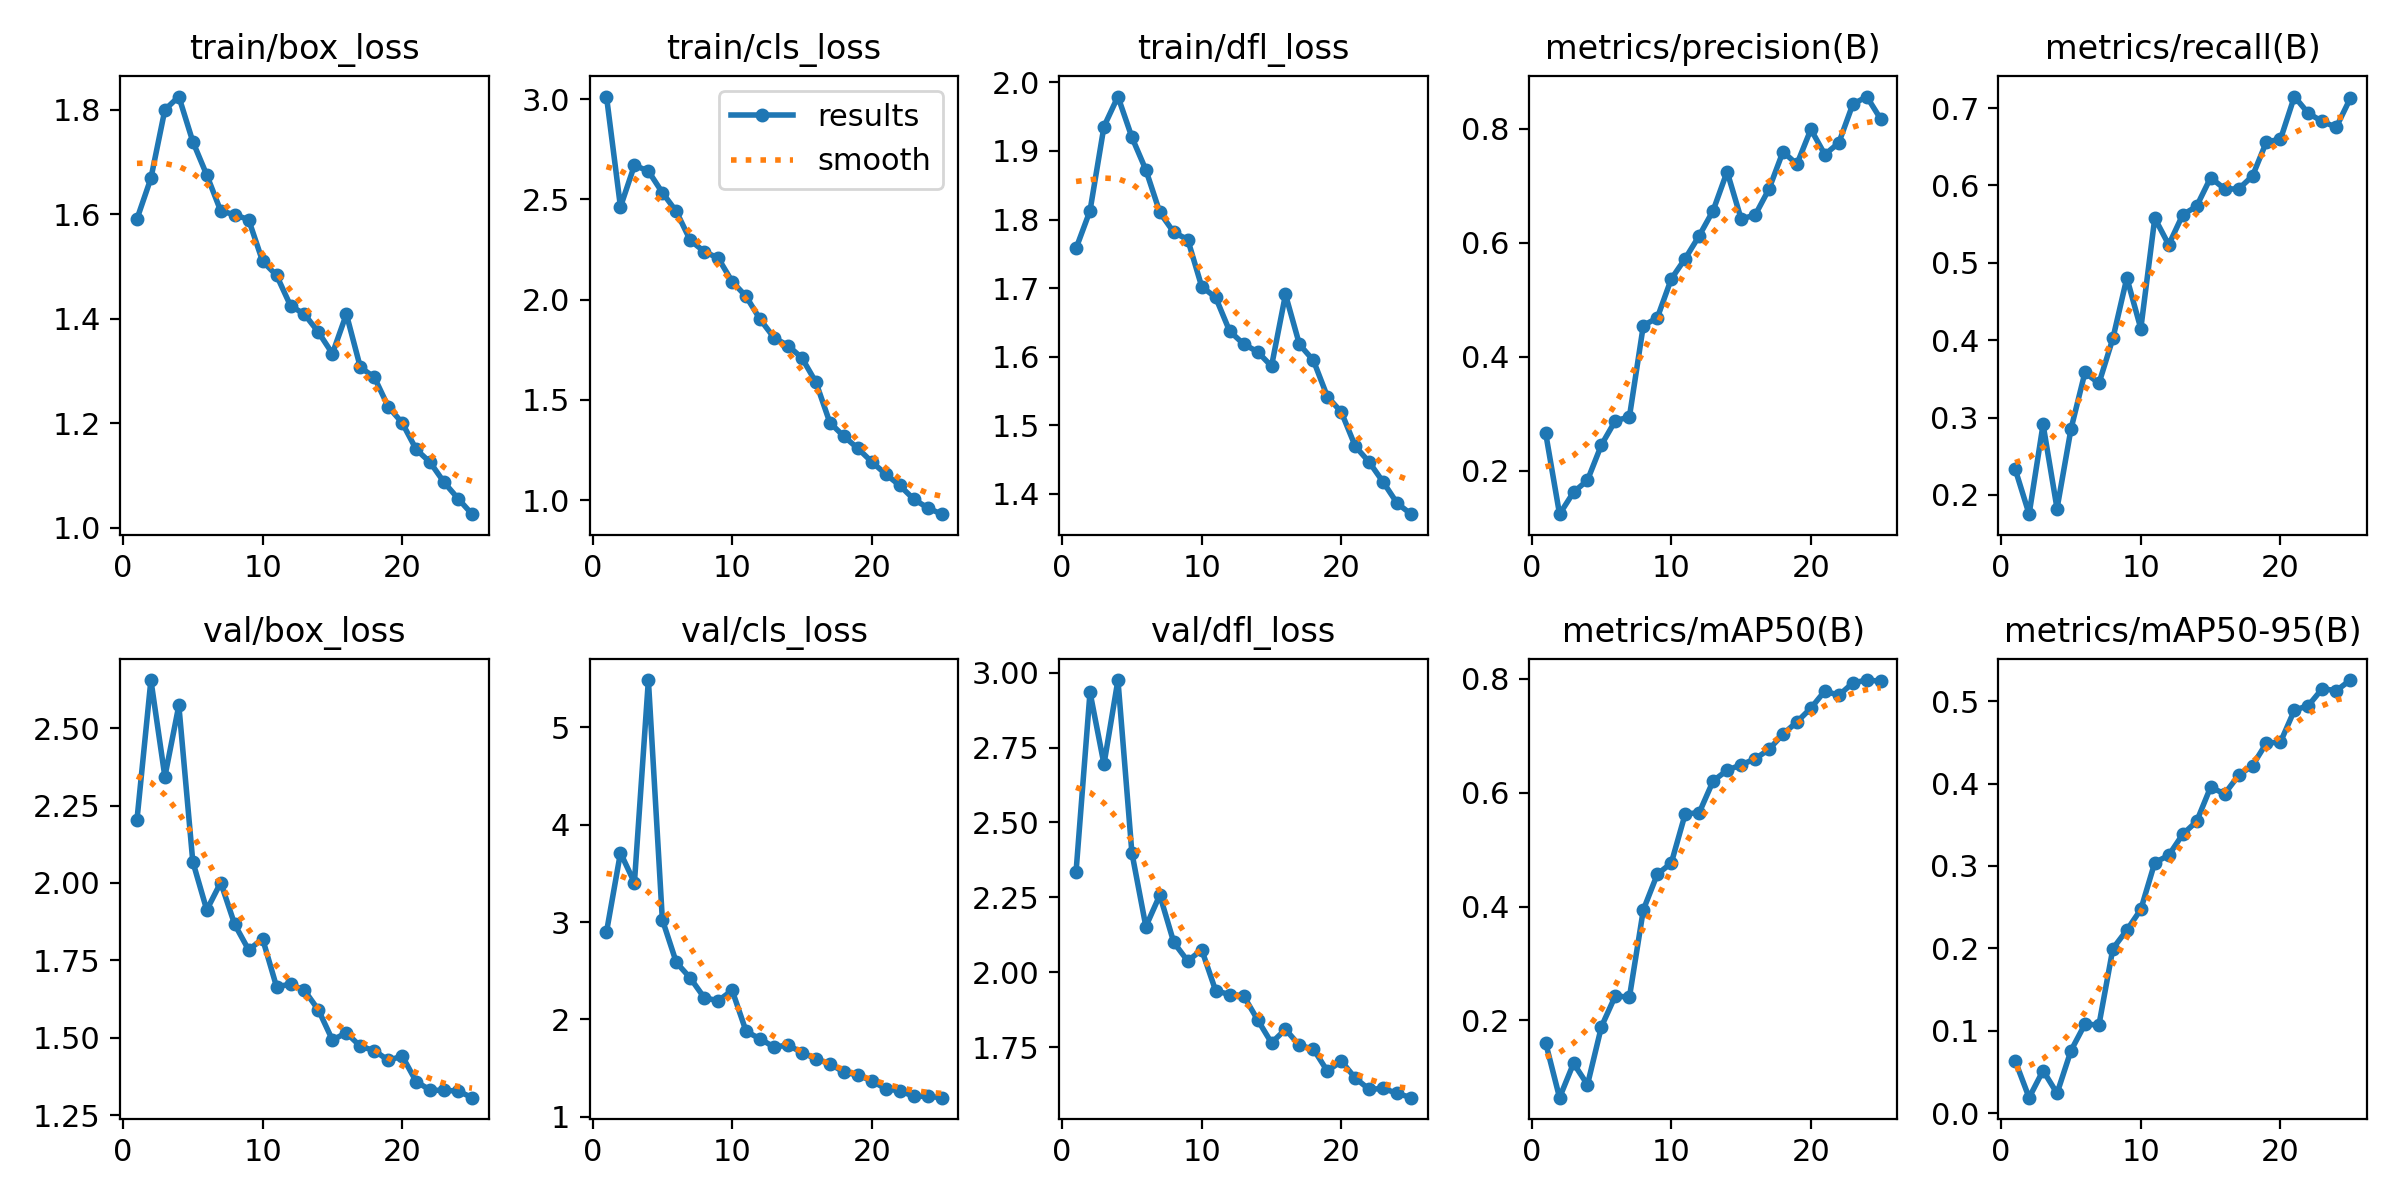

In [ ]:
from IPython.display import Image, display

display(Image(filename='runs/detect/train5/results.png'))

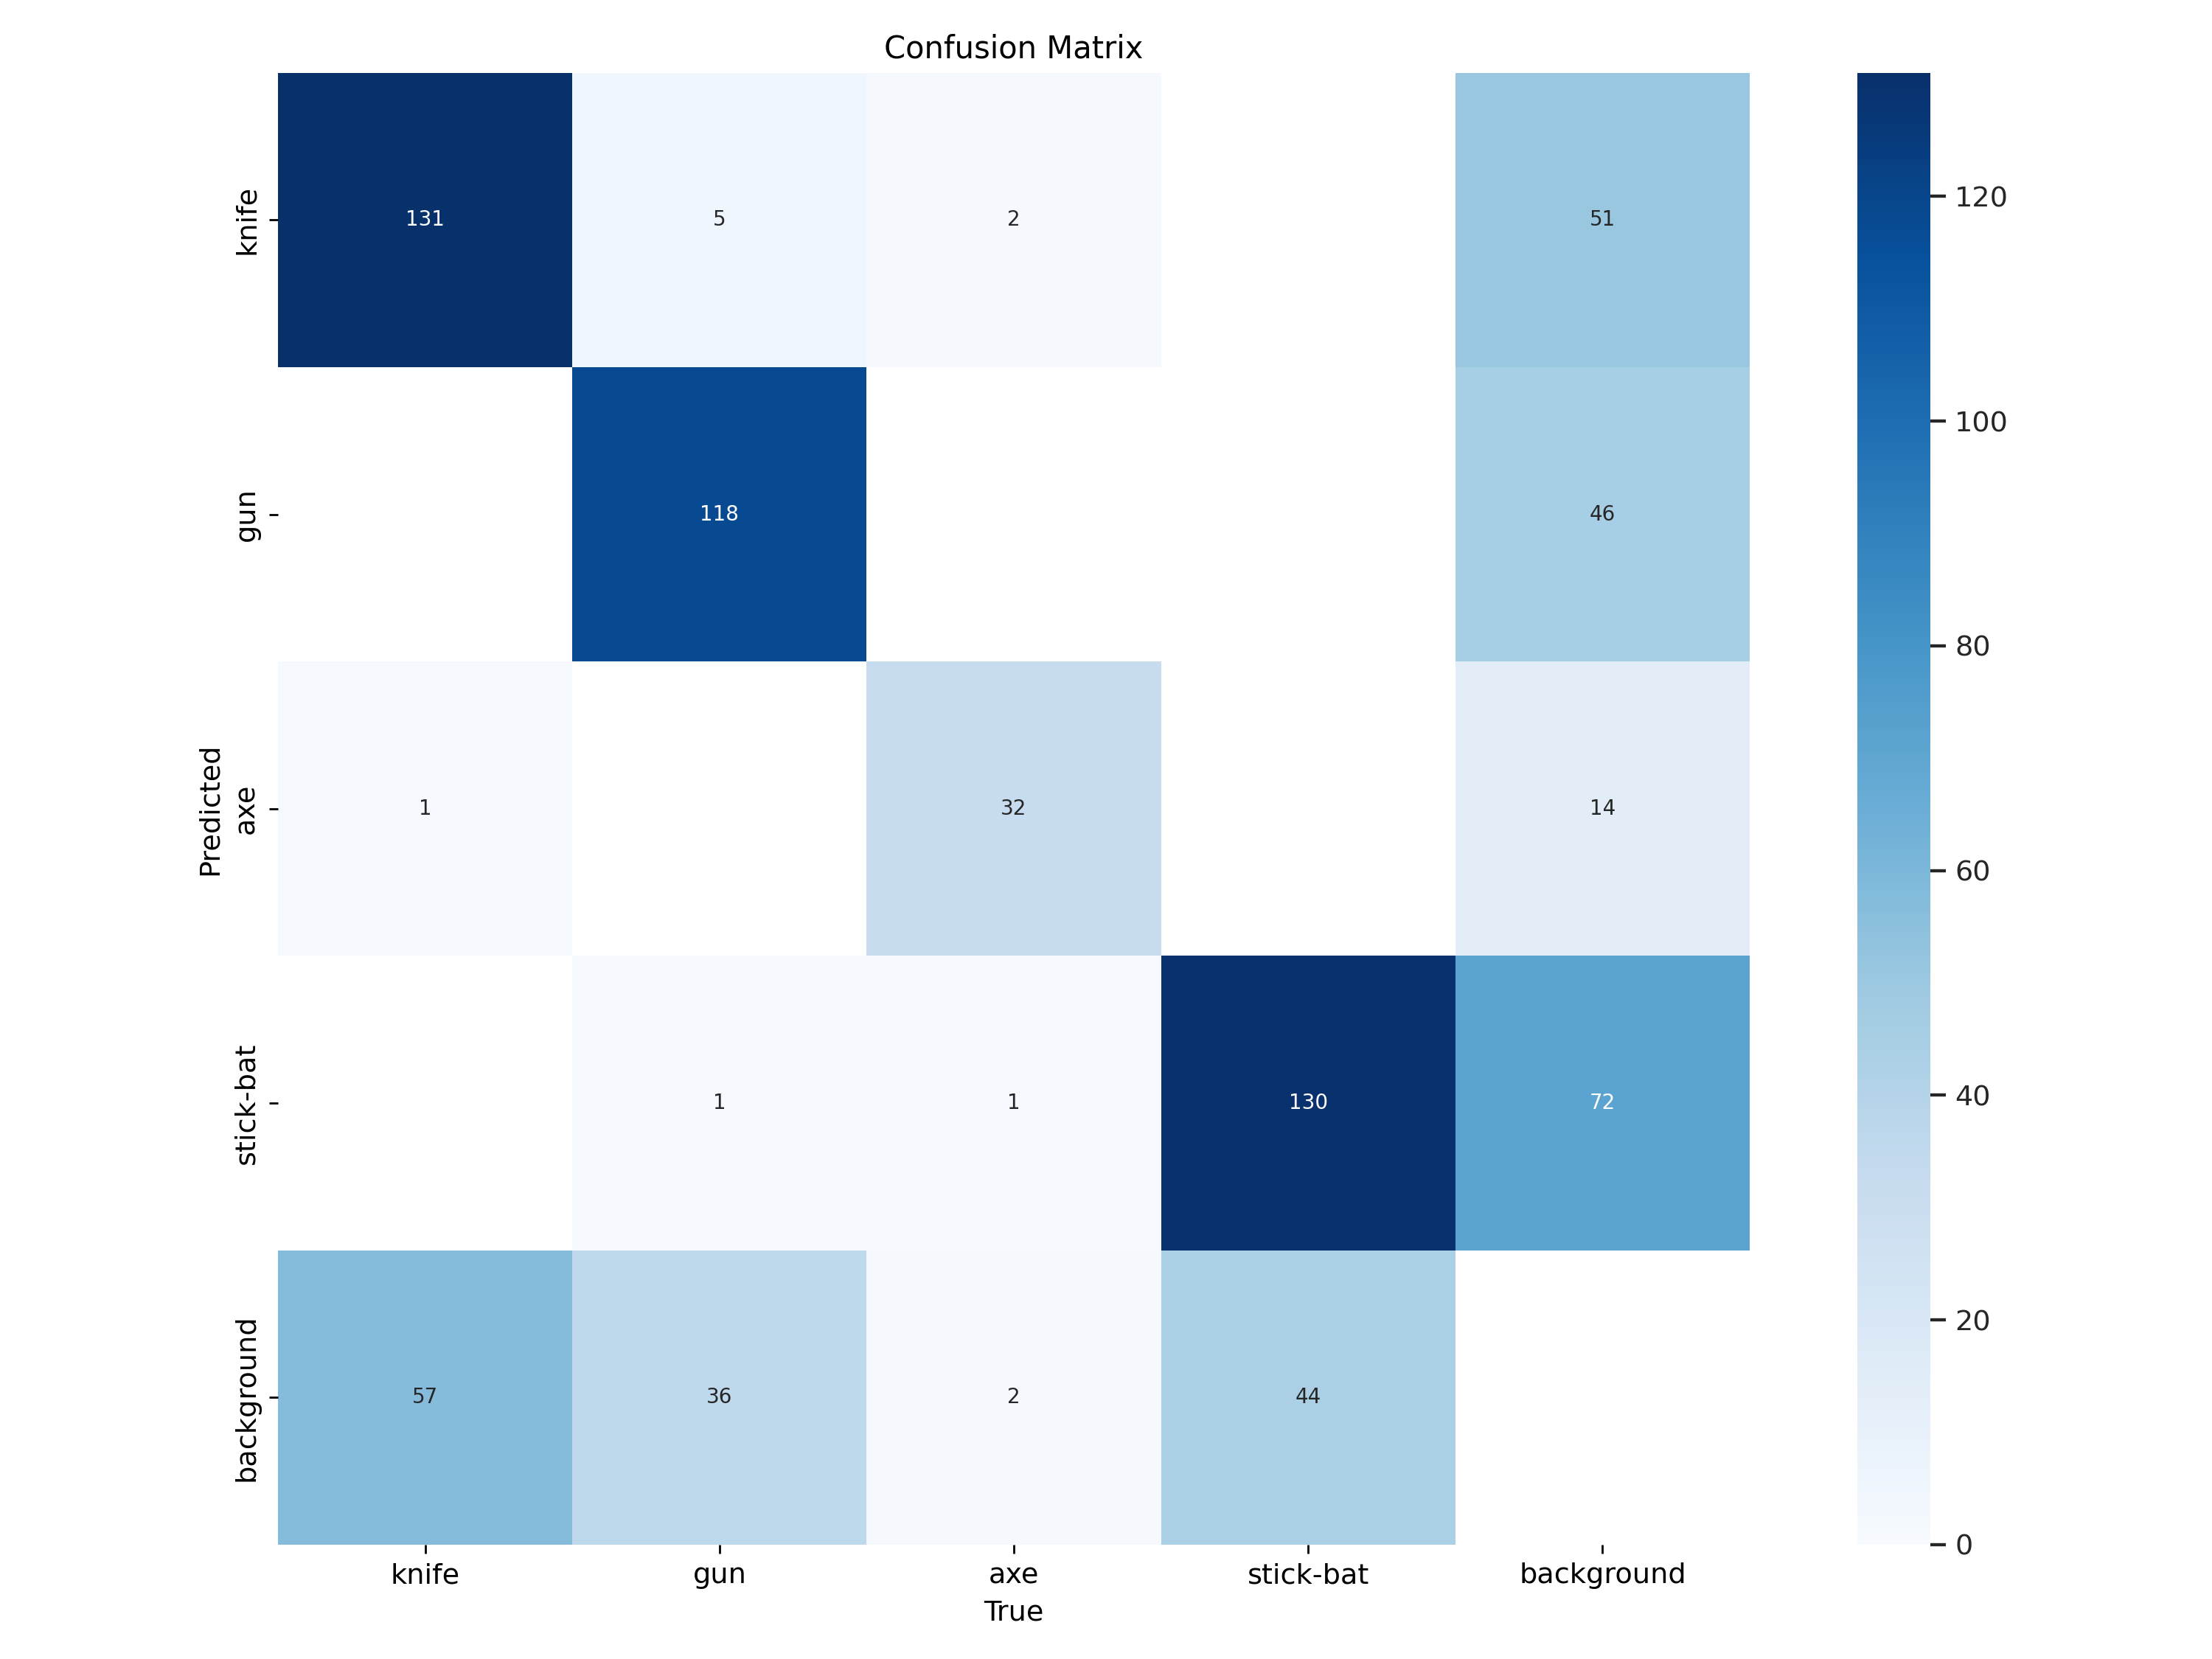

In [ ]:
display(Image(filename='runs/detect/train5/confusion_matrix.png'))

In [ ]:
from ultralytics import YOLO

model = YOLO('runs/detect/train5/weights/best.pt')

results = model.val()


Ultralytics 8.3.123 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,127,132 parameters, 0 gradients, 28.4 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 941.2±501.2 MB/s, size: 36.6 KB)


val: Scanning /content/final_dataset/valid/labels.cache... 415 images, 1 backgrounds, 0 corrupt: 100%|██████████| 415/415 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 41, len(boxes) = 560. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:07<00:00,  3.55it/s]


                   all        415        560      0.818      0.712      0.796      0.526
                 knife        136        189      0.808      0.625      0.725      0.457
                   gun        129        160       0.83      0.681      0.793      0.549
                   axe         36         37      0.809      0.865      0.925      0.672
             stick-bat        113        174      0.825      0.678      0.742      0.425
Speed: 2.1ms preprocess, 9.4ms inference, 0.0ms loss, 1.4ms postprocess per image
Results saved to runs/detect/val


In [ ]:
import os

print(os.listdir('runs/detect/val'))


['R_curve.png', 'val_batch0_pred.jpg', 'confusion_matrix_normalized.png', 'confusion_matrix.png', 'val_batch2_pred.jpg', 'val_batch0_labels.jpg', 'P_curve.png', 'val_batch1_labels.jpg', 'val_batch1_pred.jpg', 'F1_curve.png', 'val_batch2_labels.jpg', 'PR_curve.png']


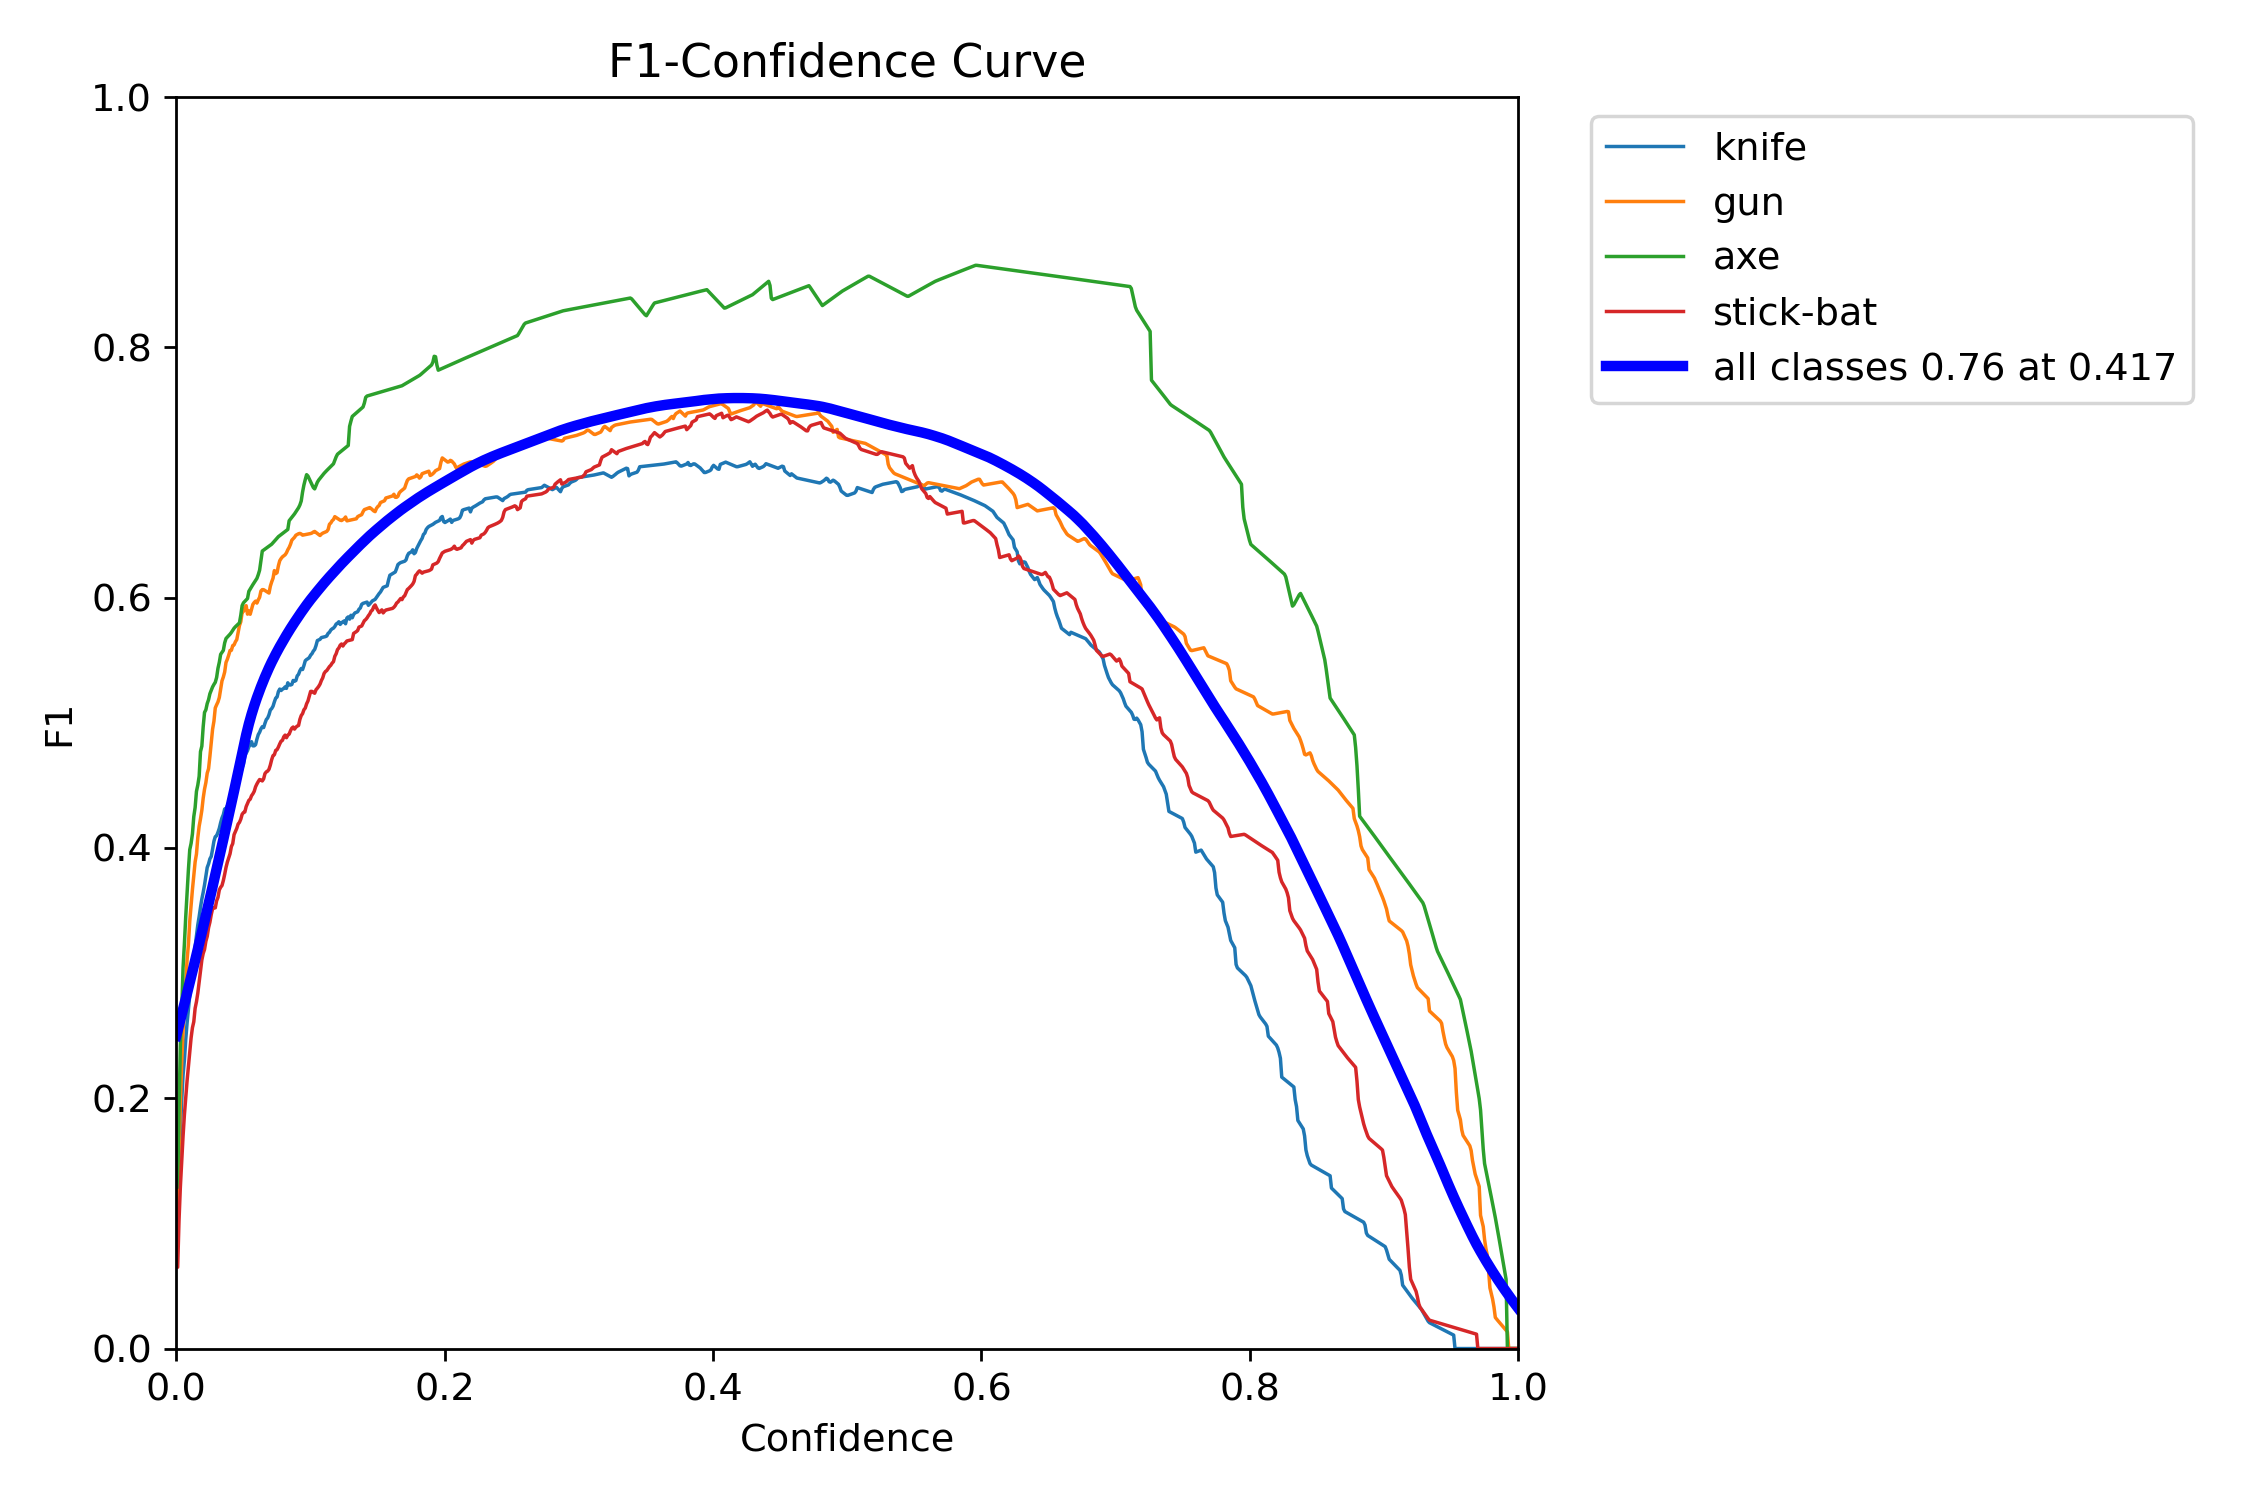

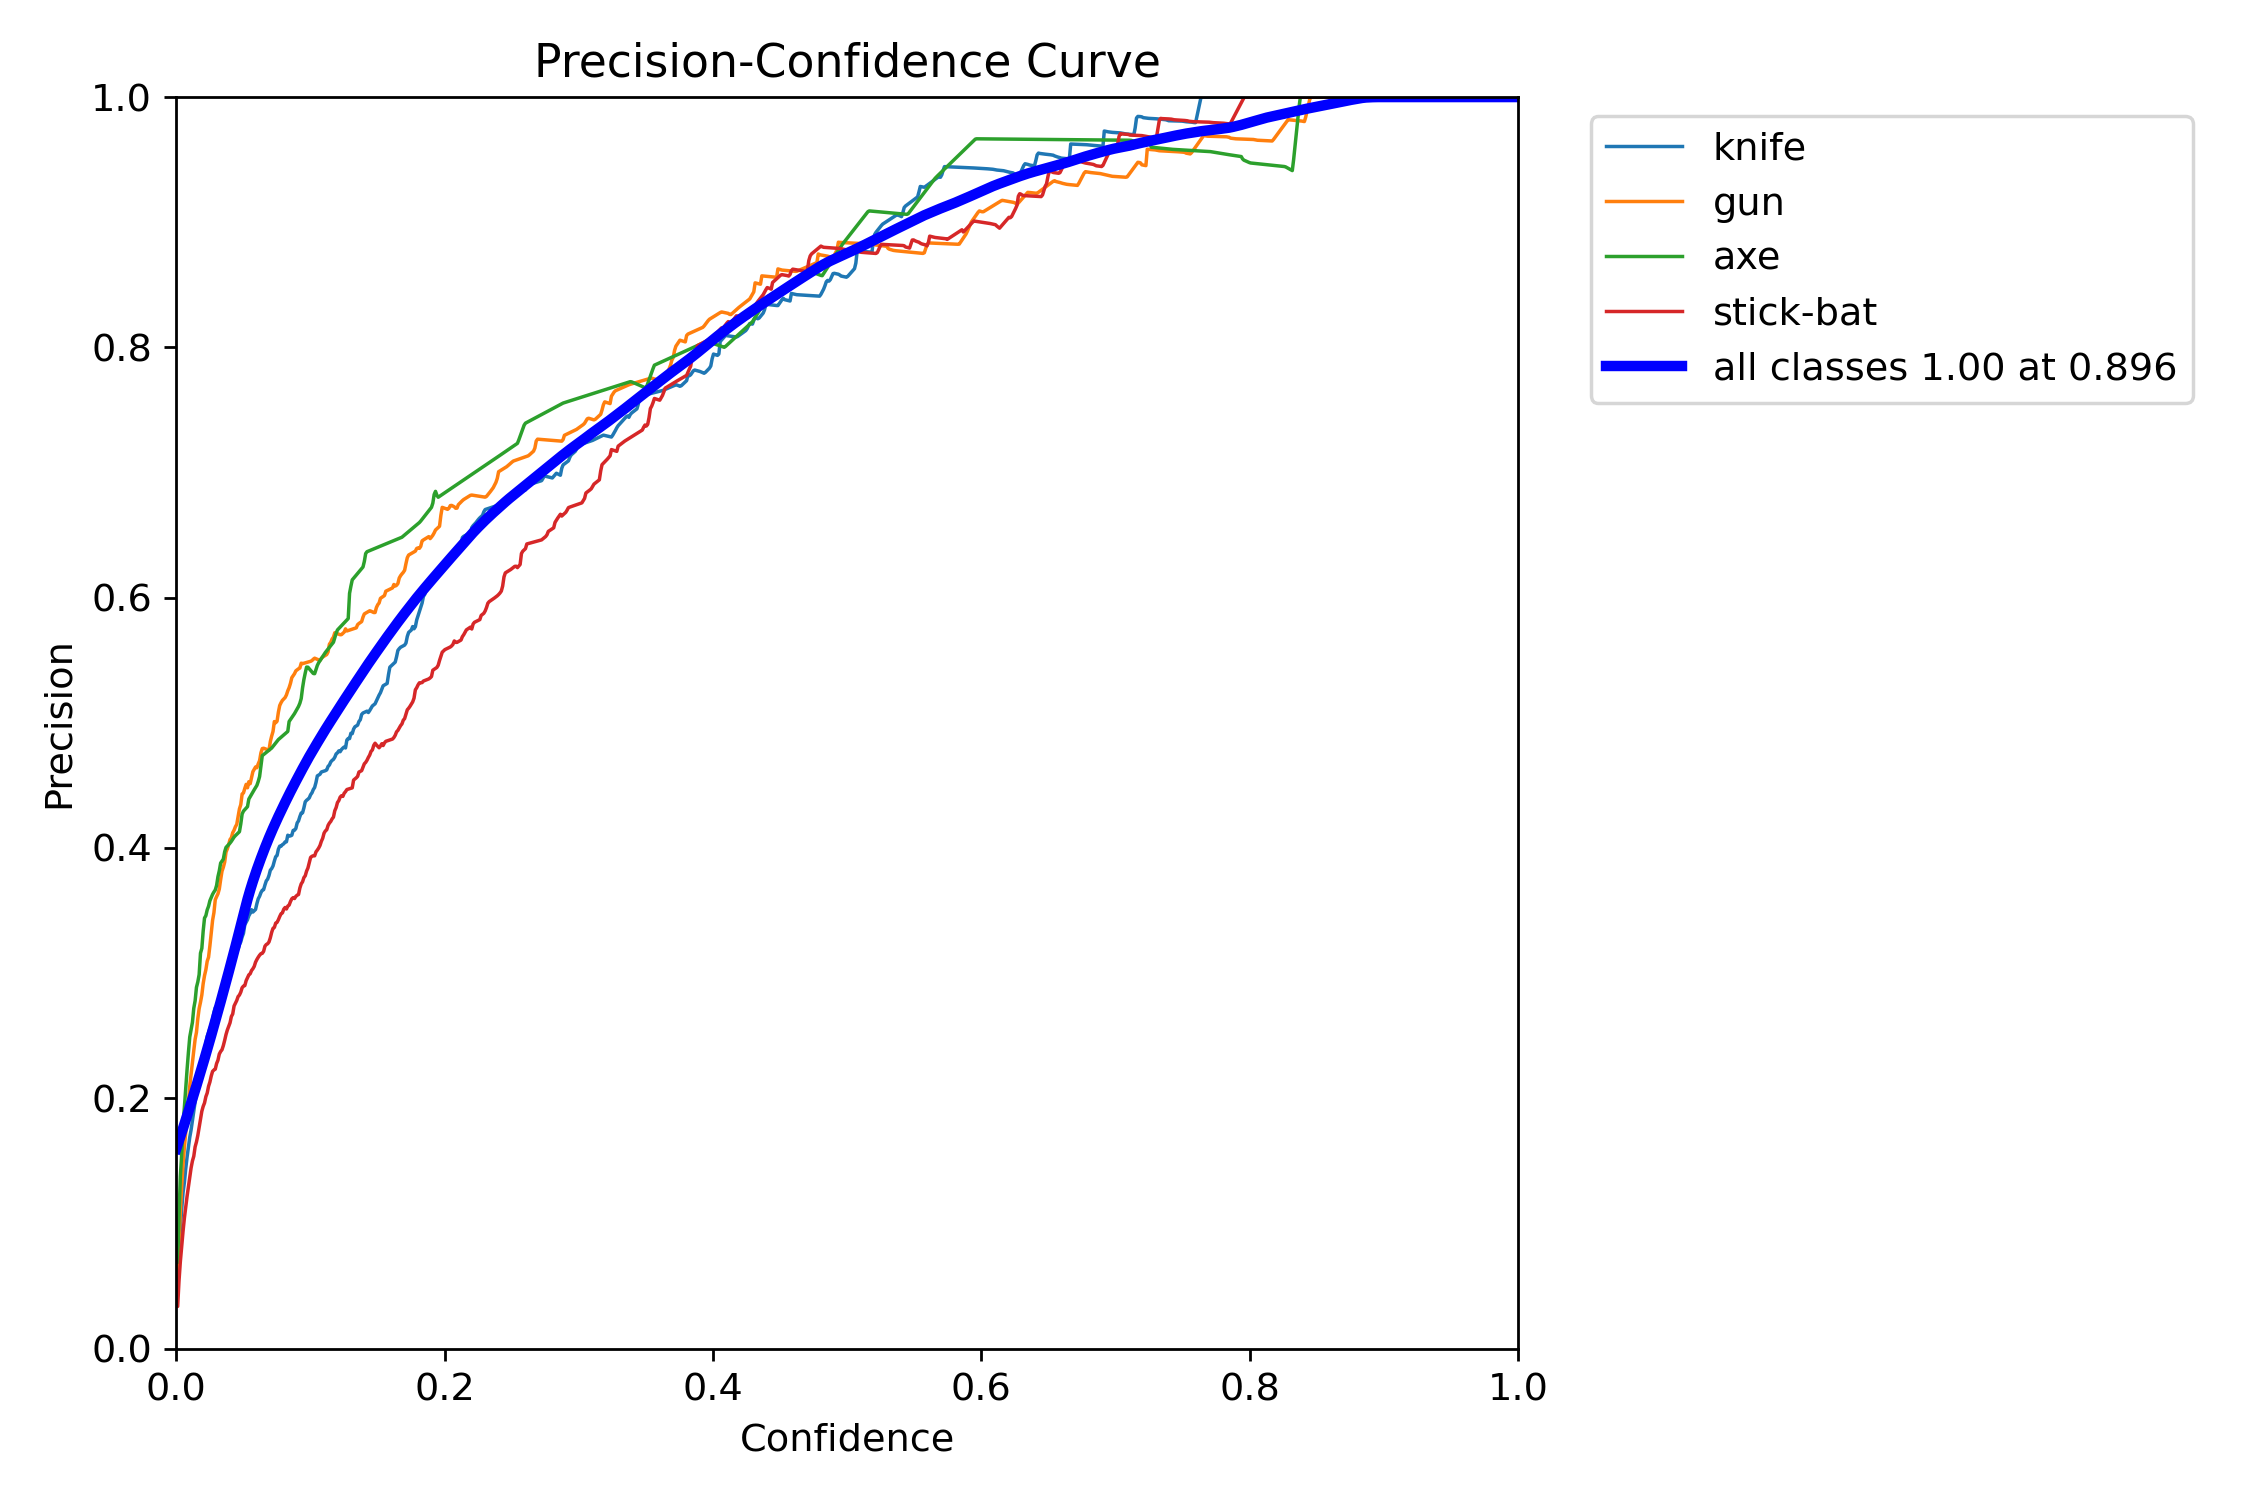

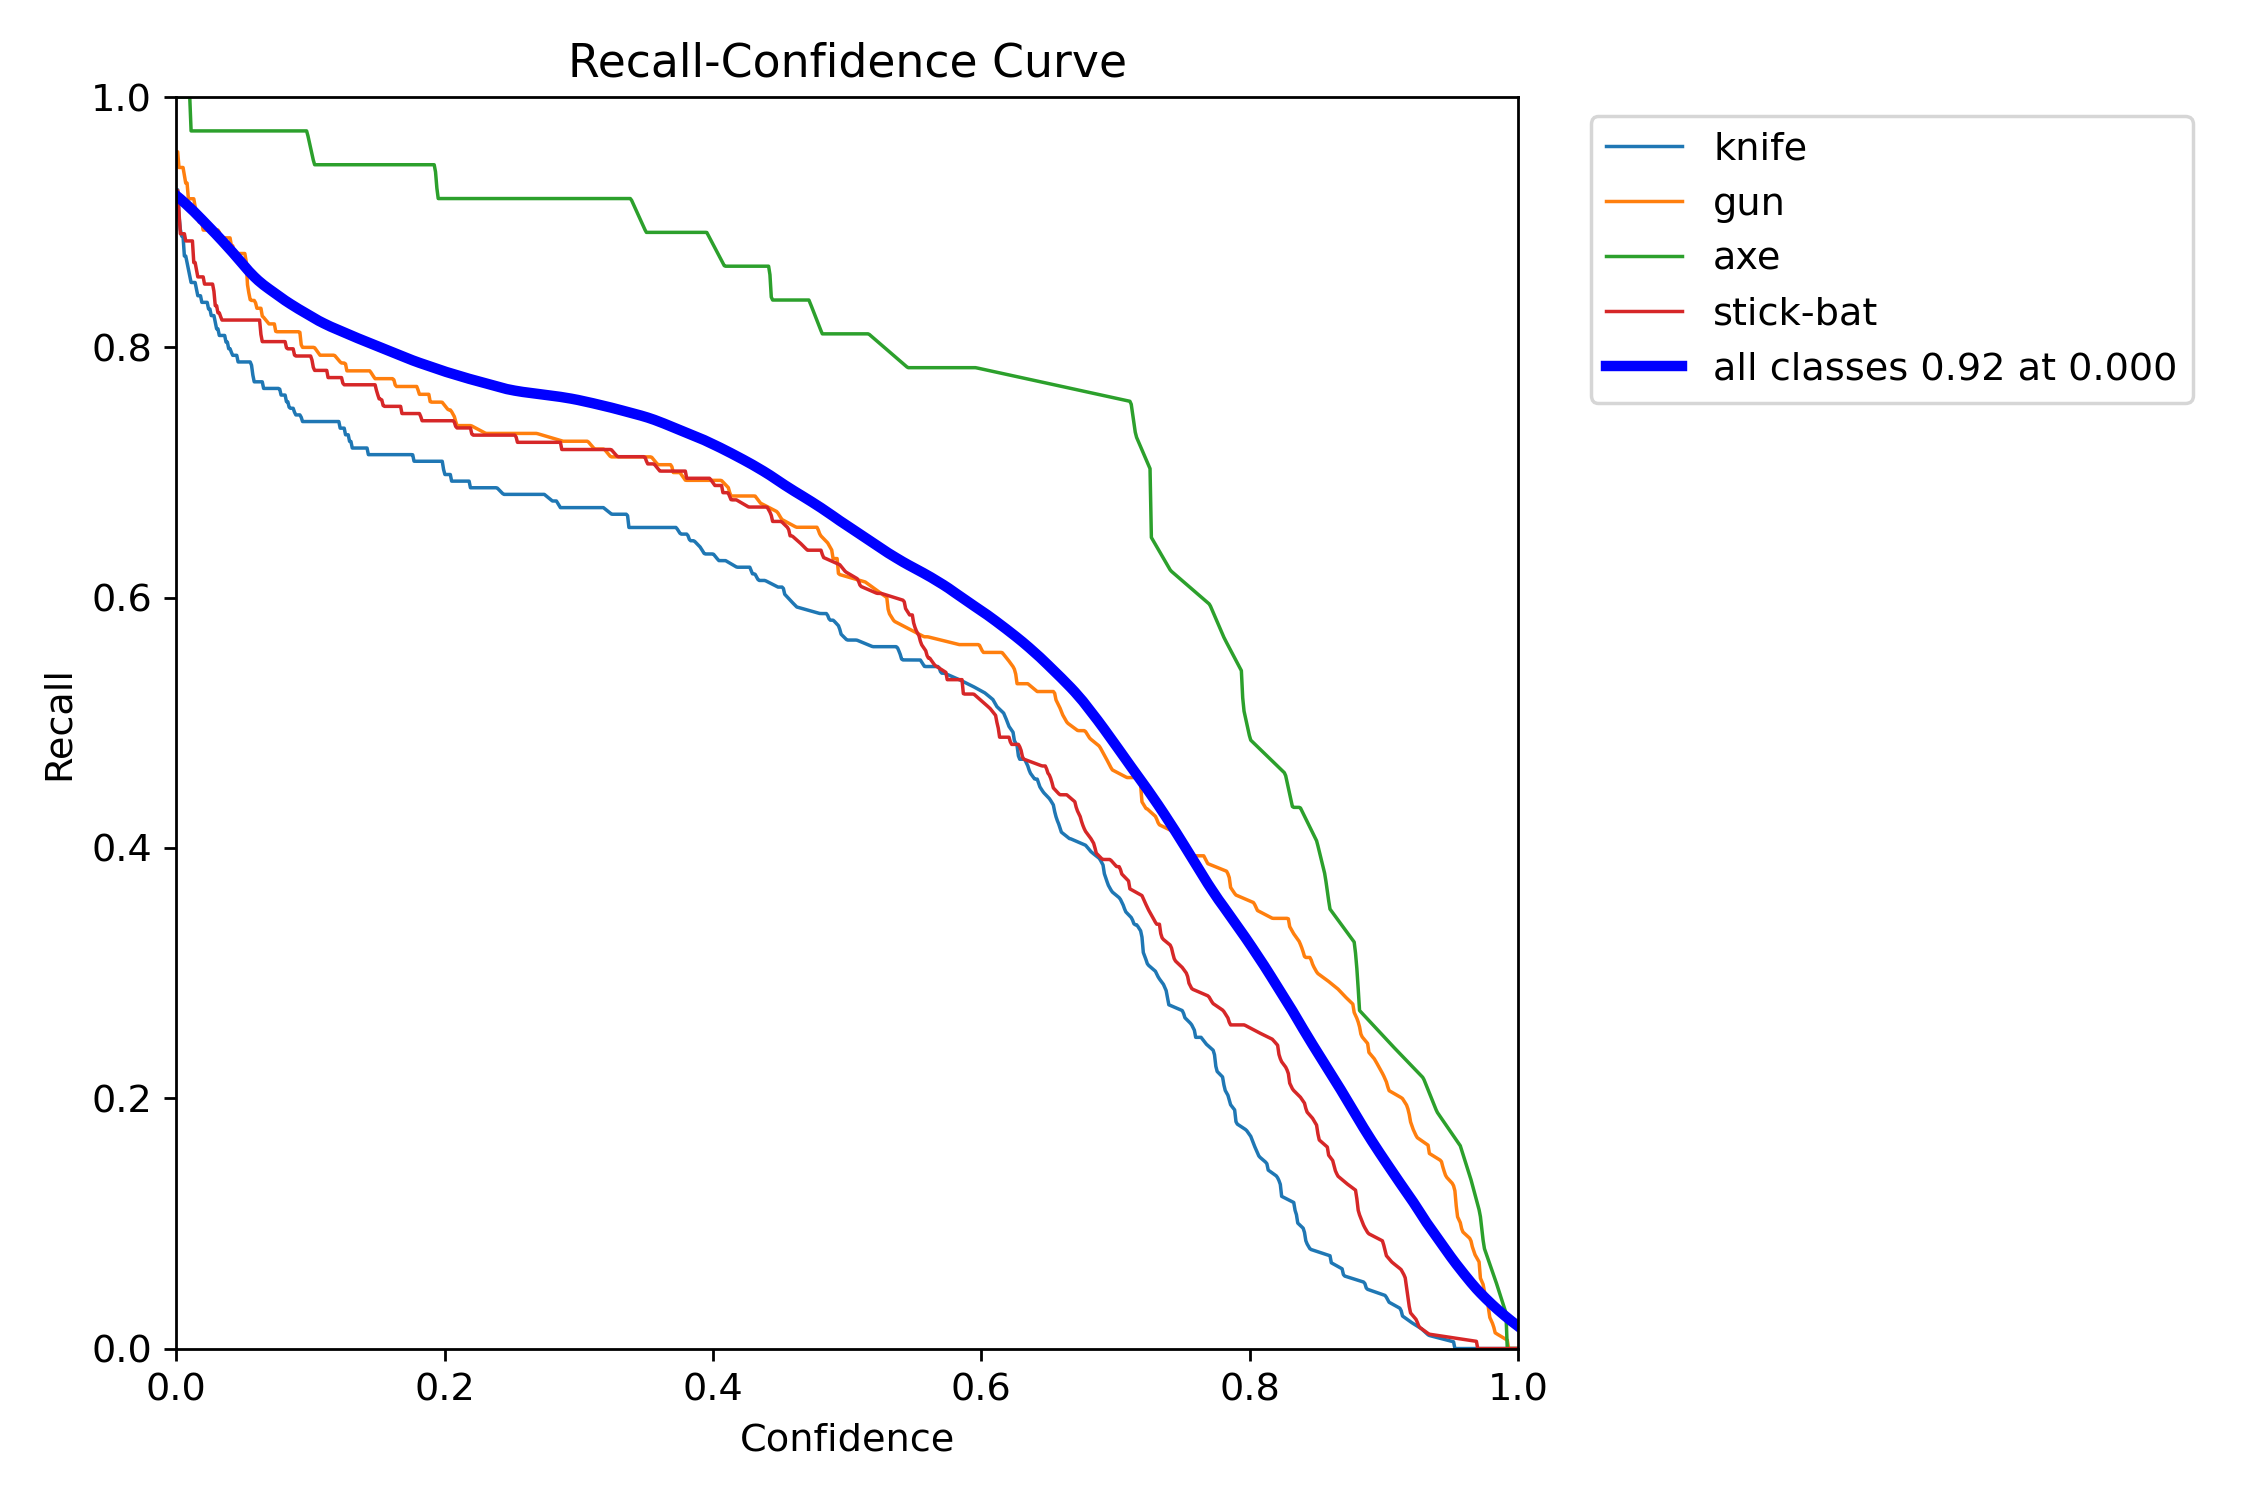

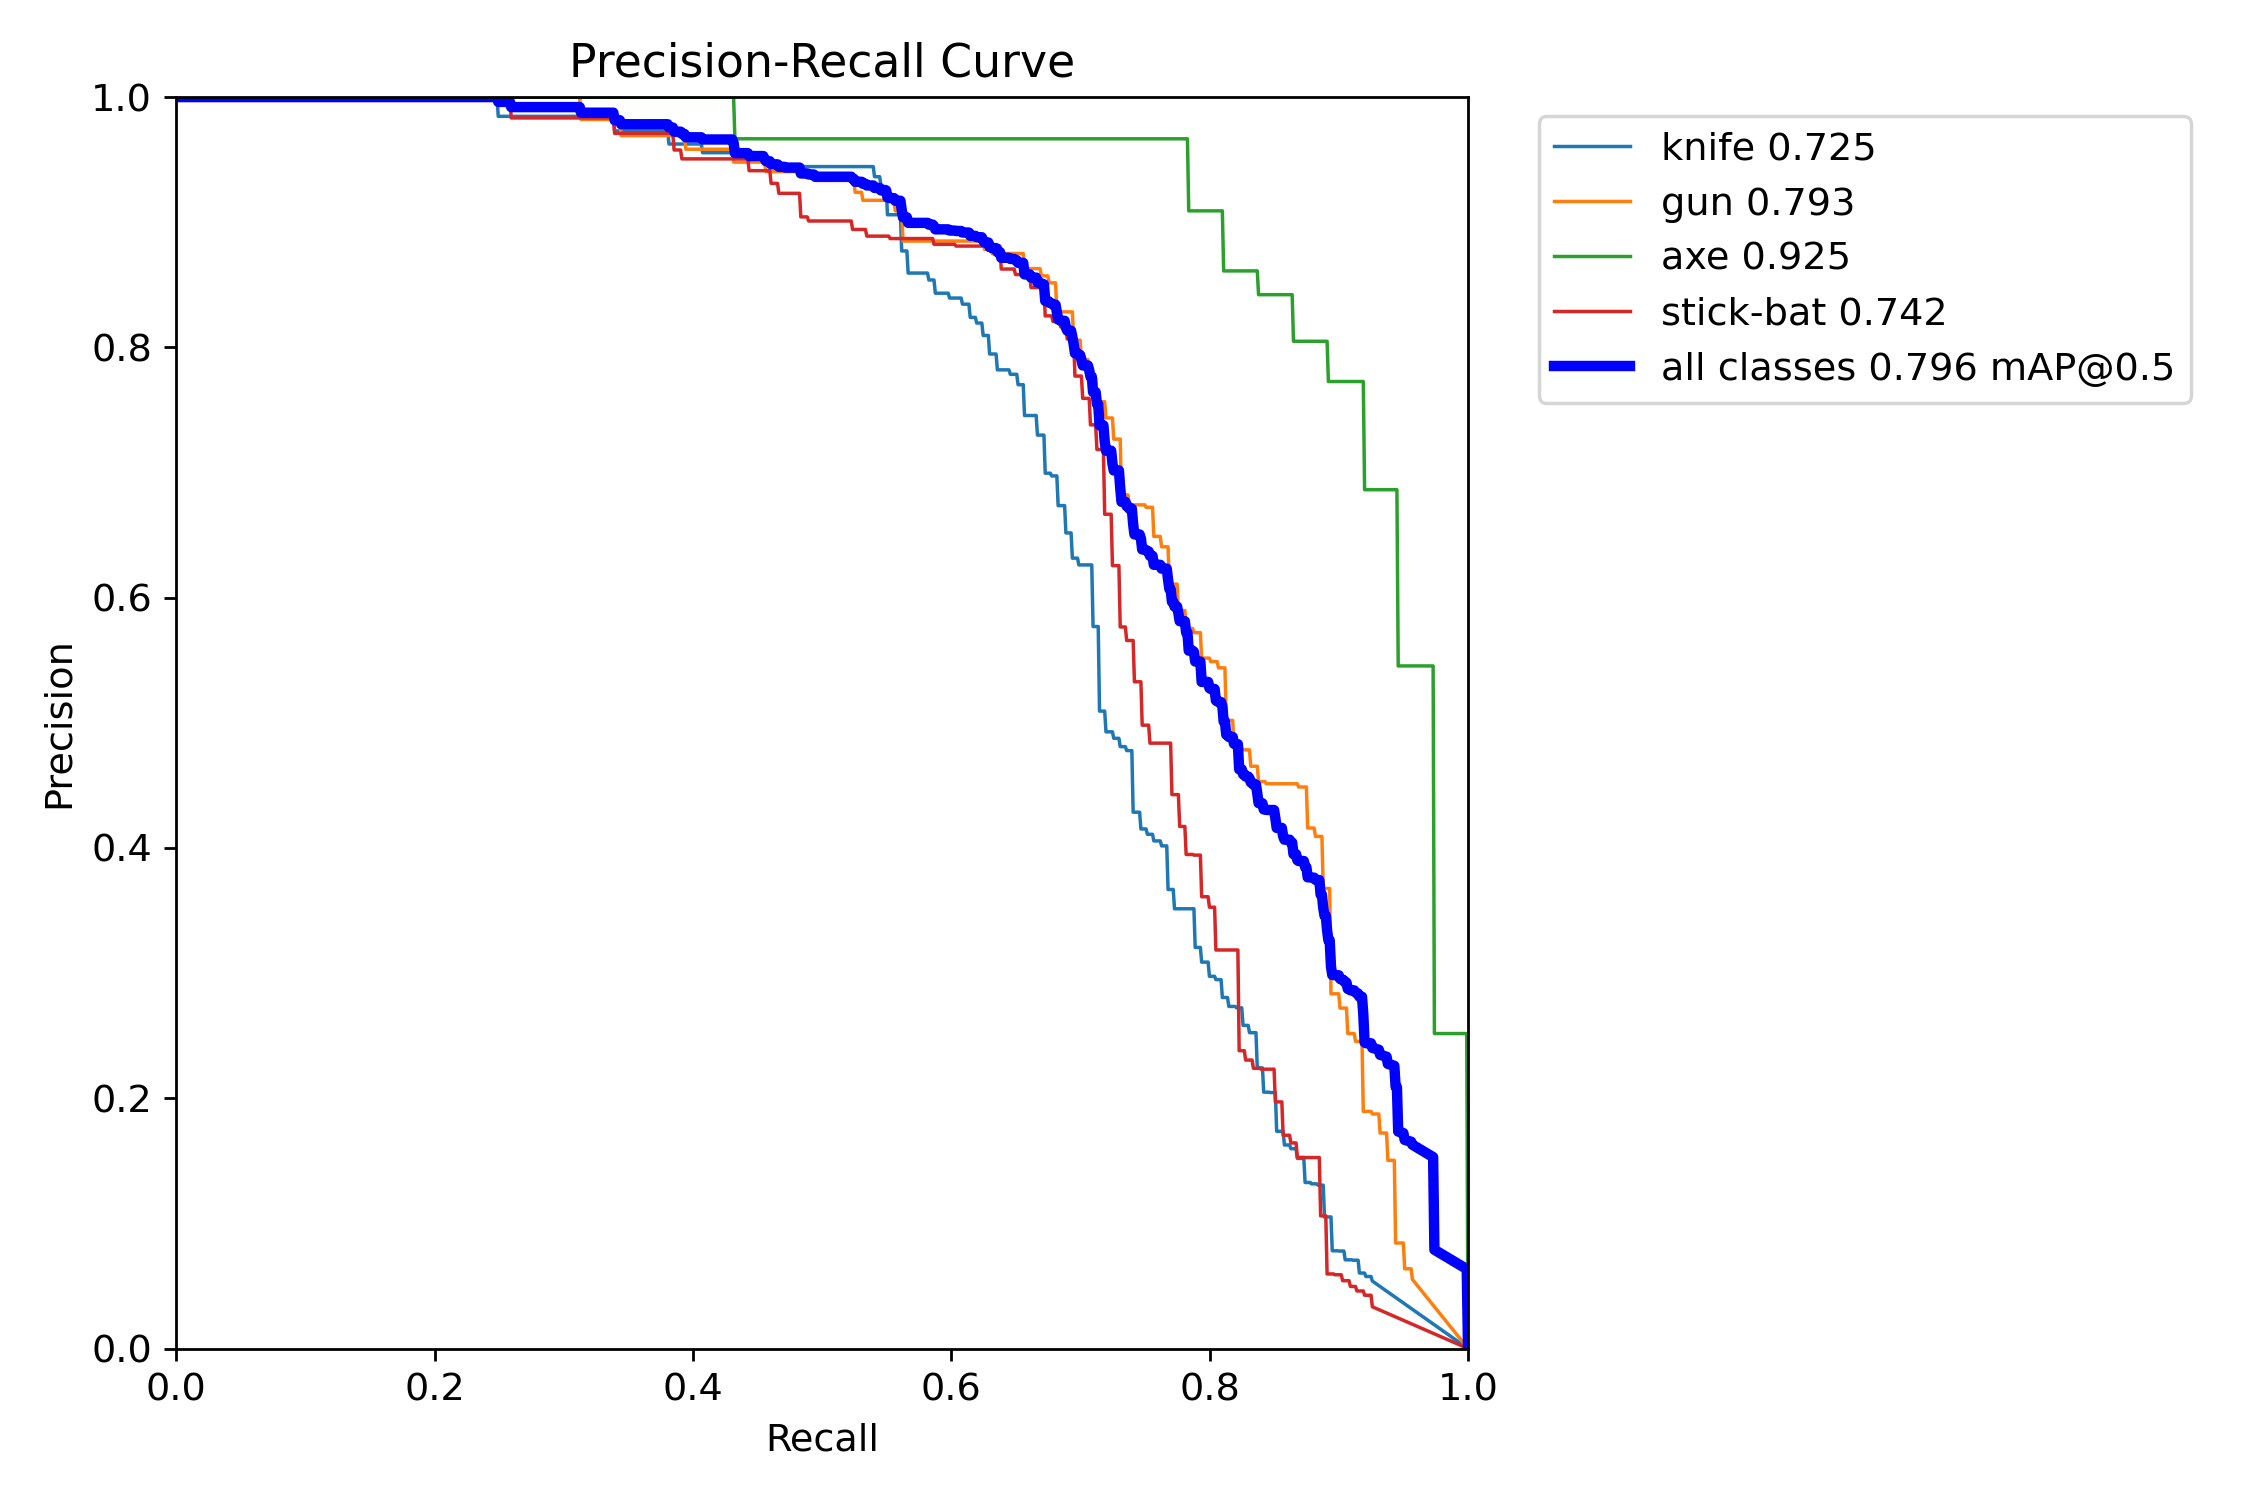

In [ ]:
from IPython.display import Image, display

display(Image(filename='runs/detect/val/F1_curve.png'))
display(Image(filename='runs/detect/val/P_curve.png'))
display(Image(filename='runs/detect/val/R_curve.png'))
display(Image(filename='runs/detect/val/PR_curve.png'))


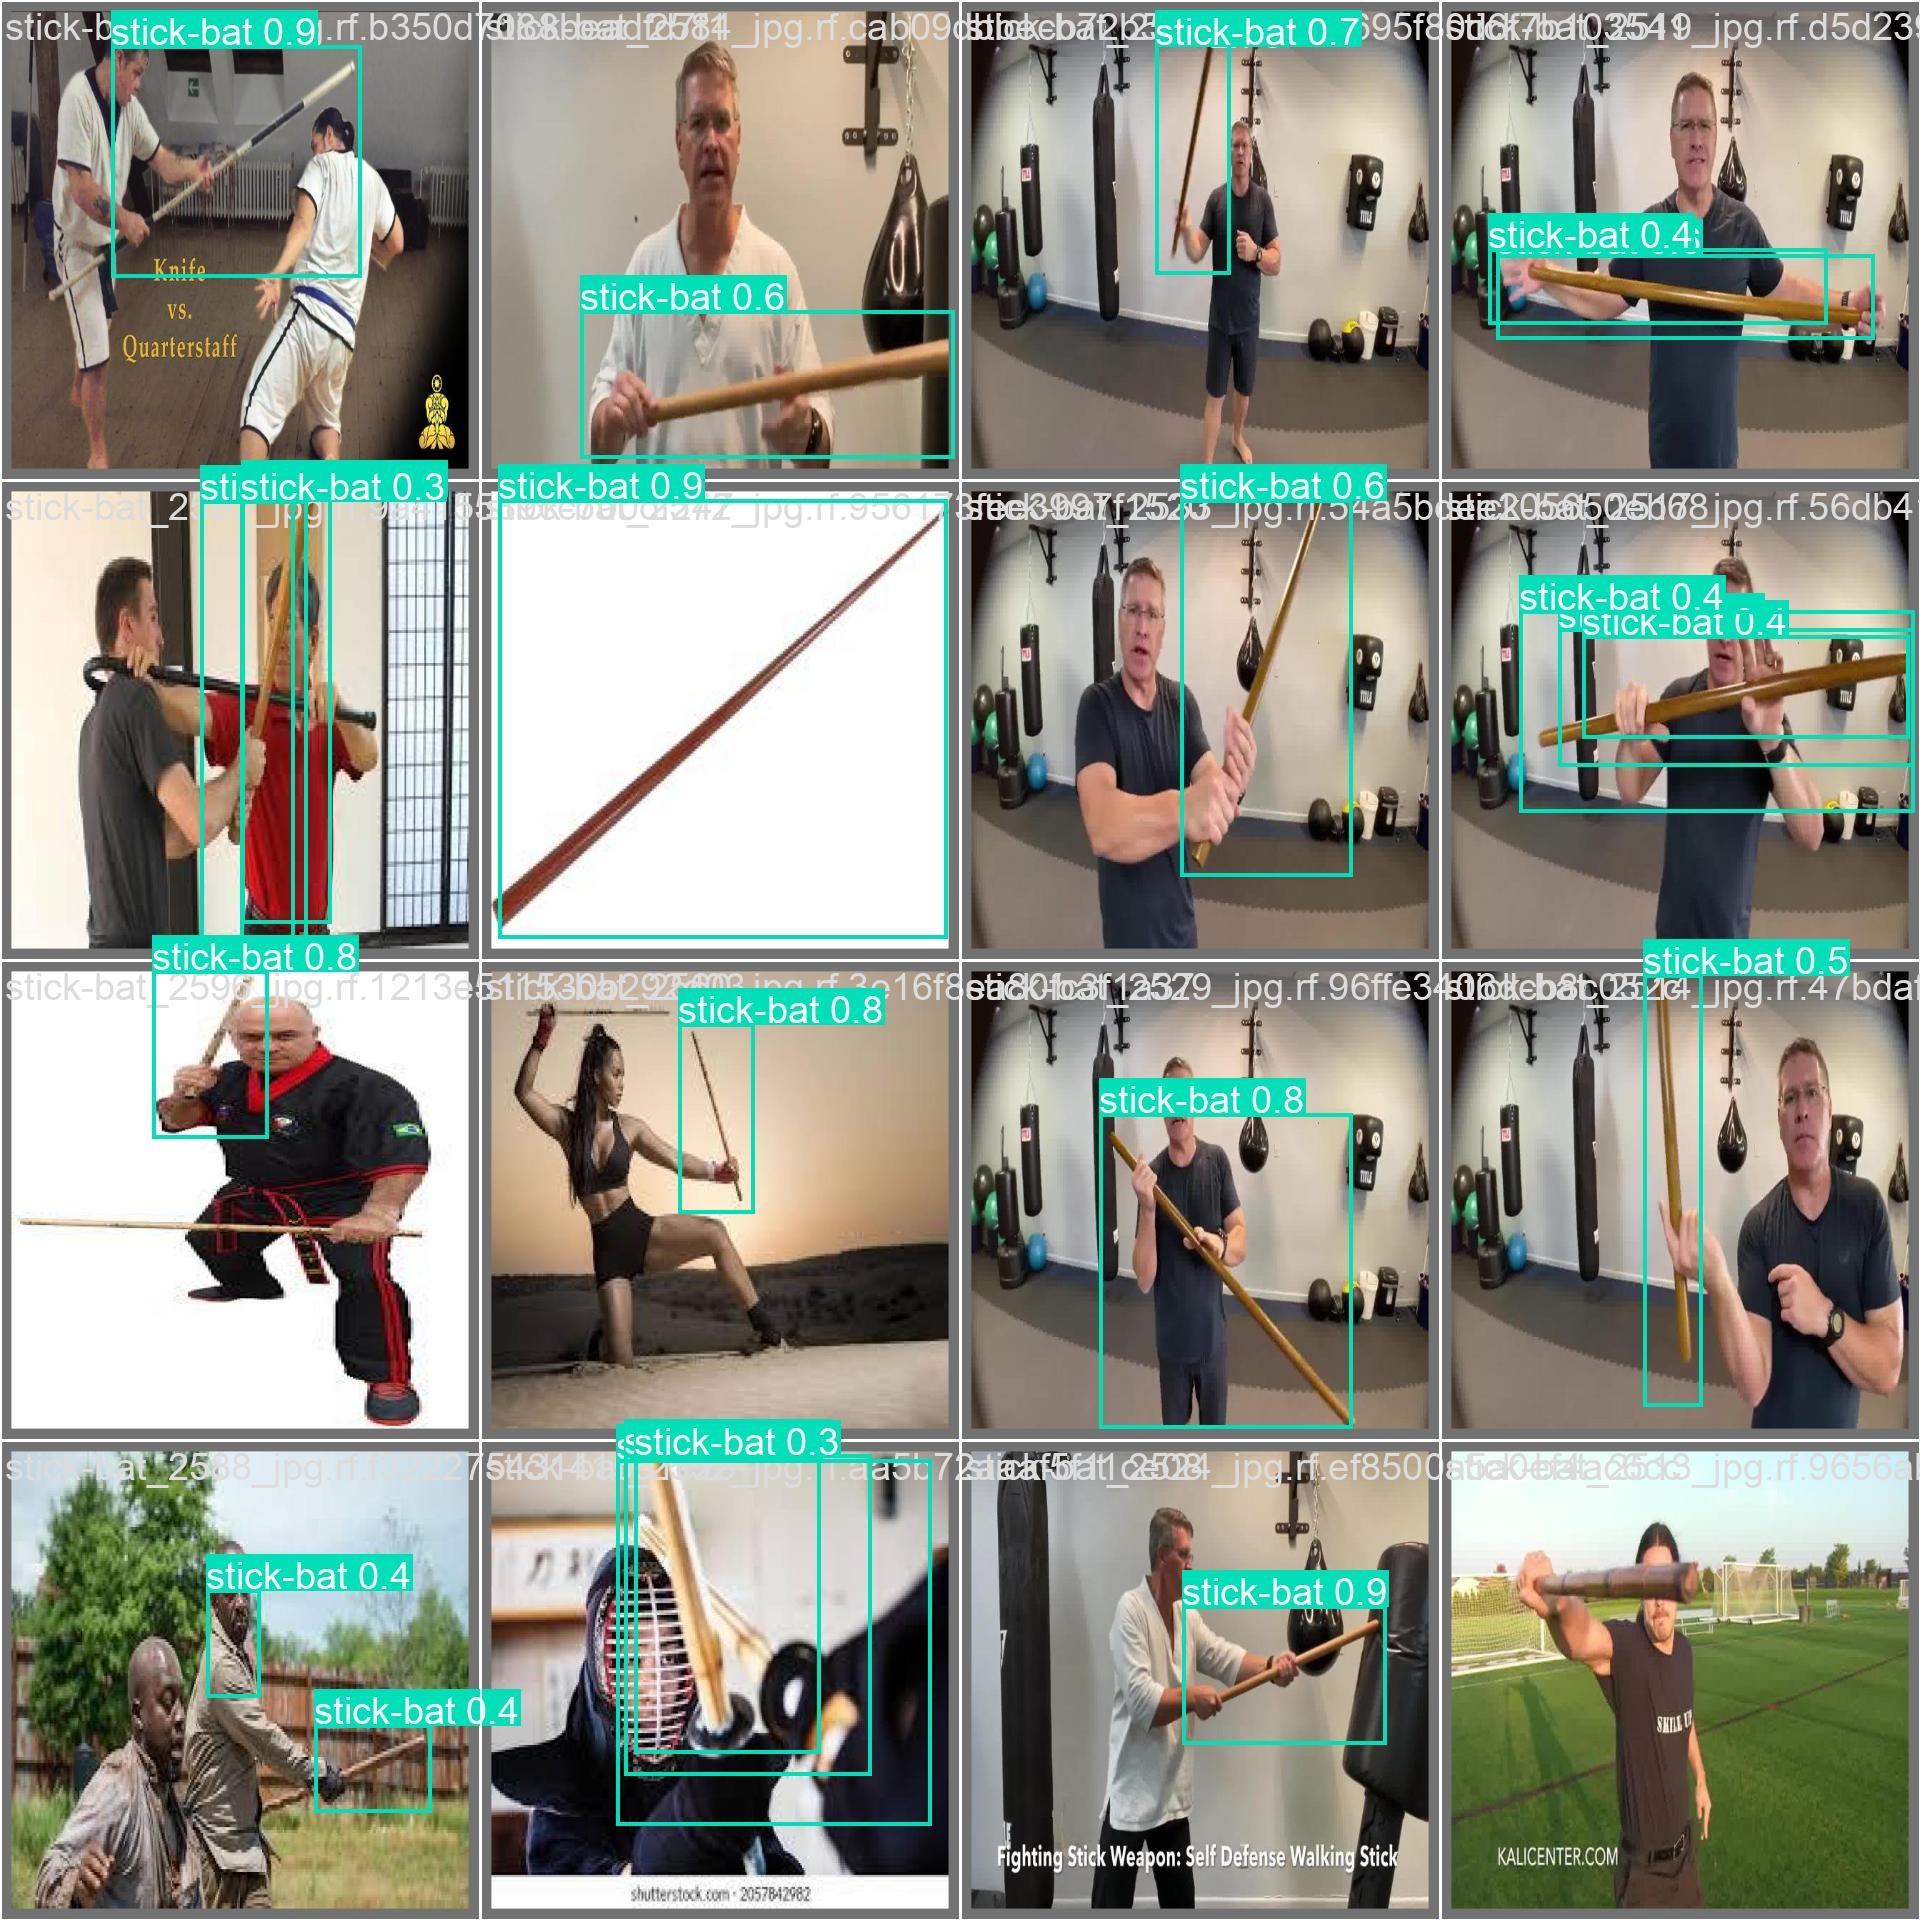

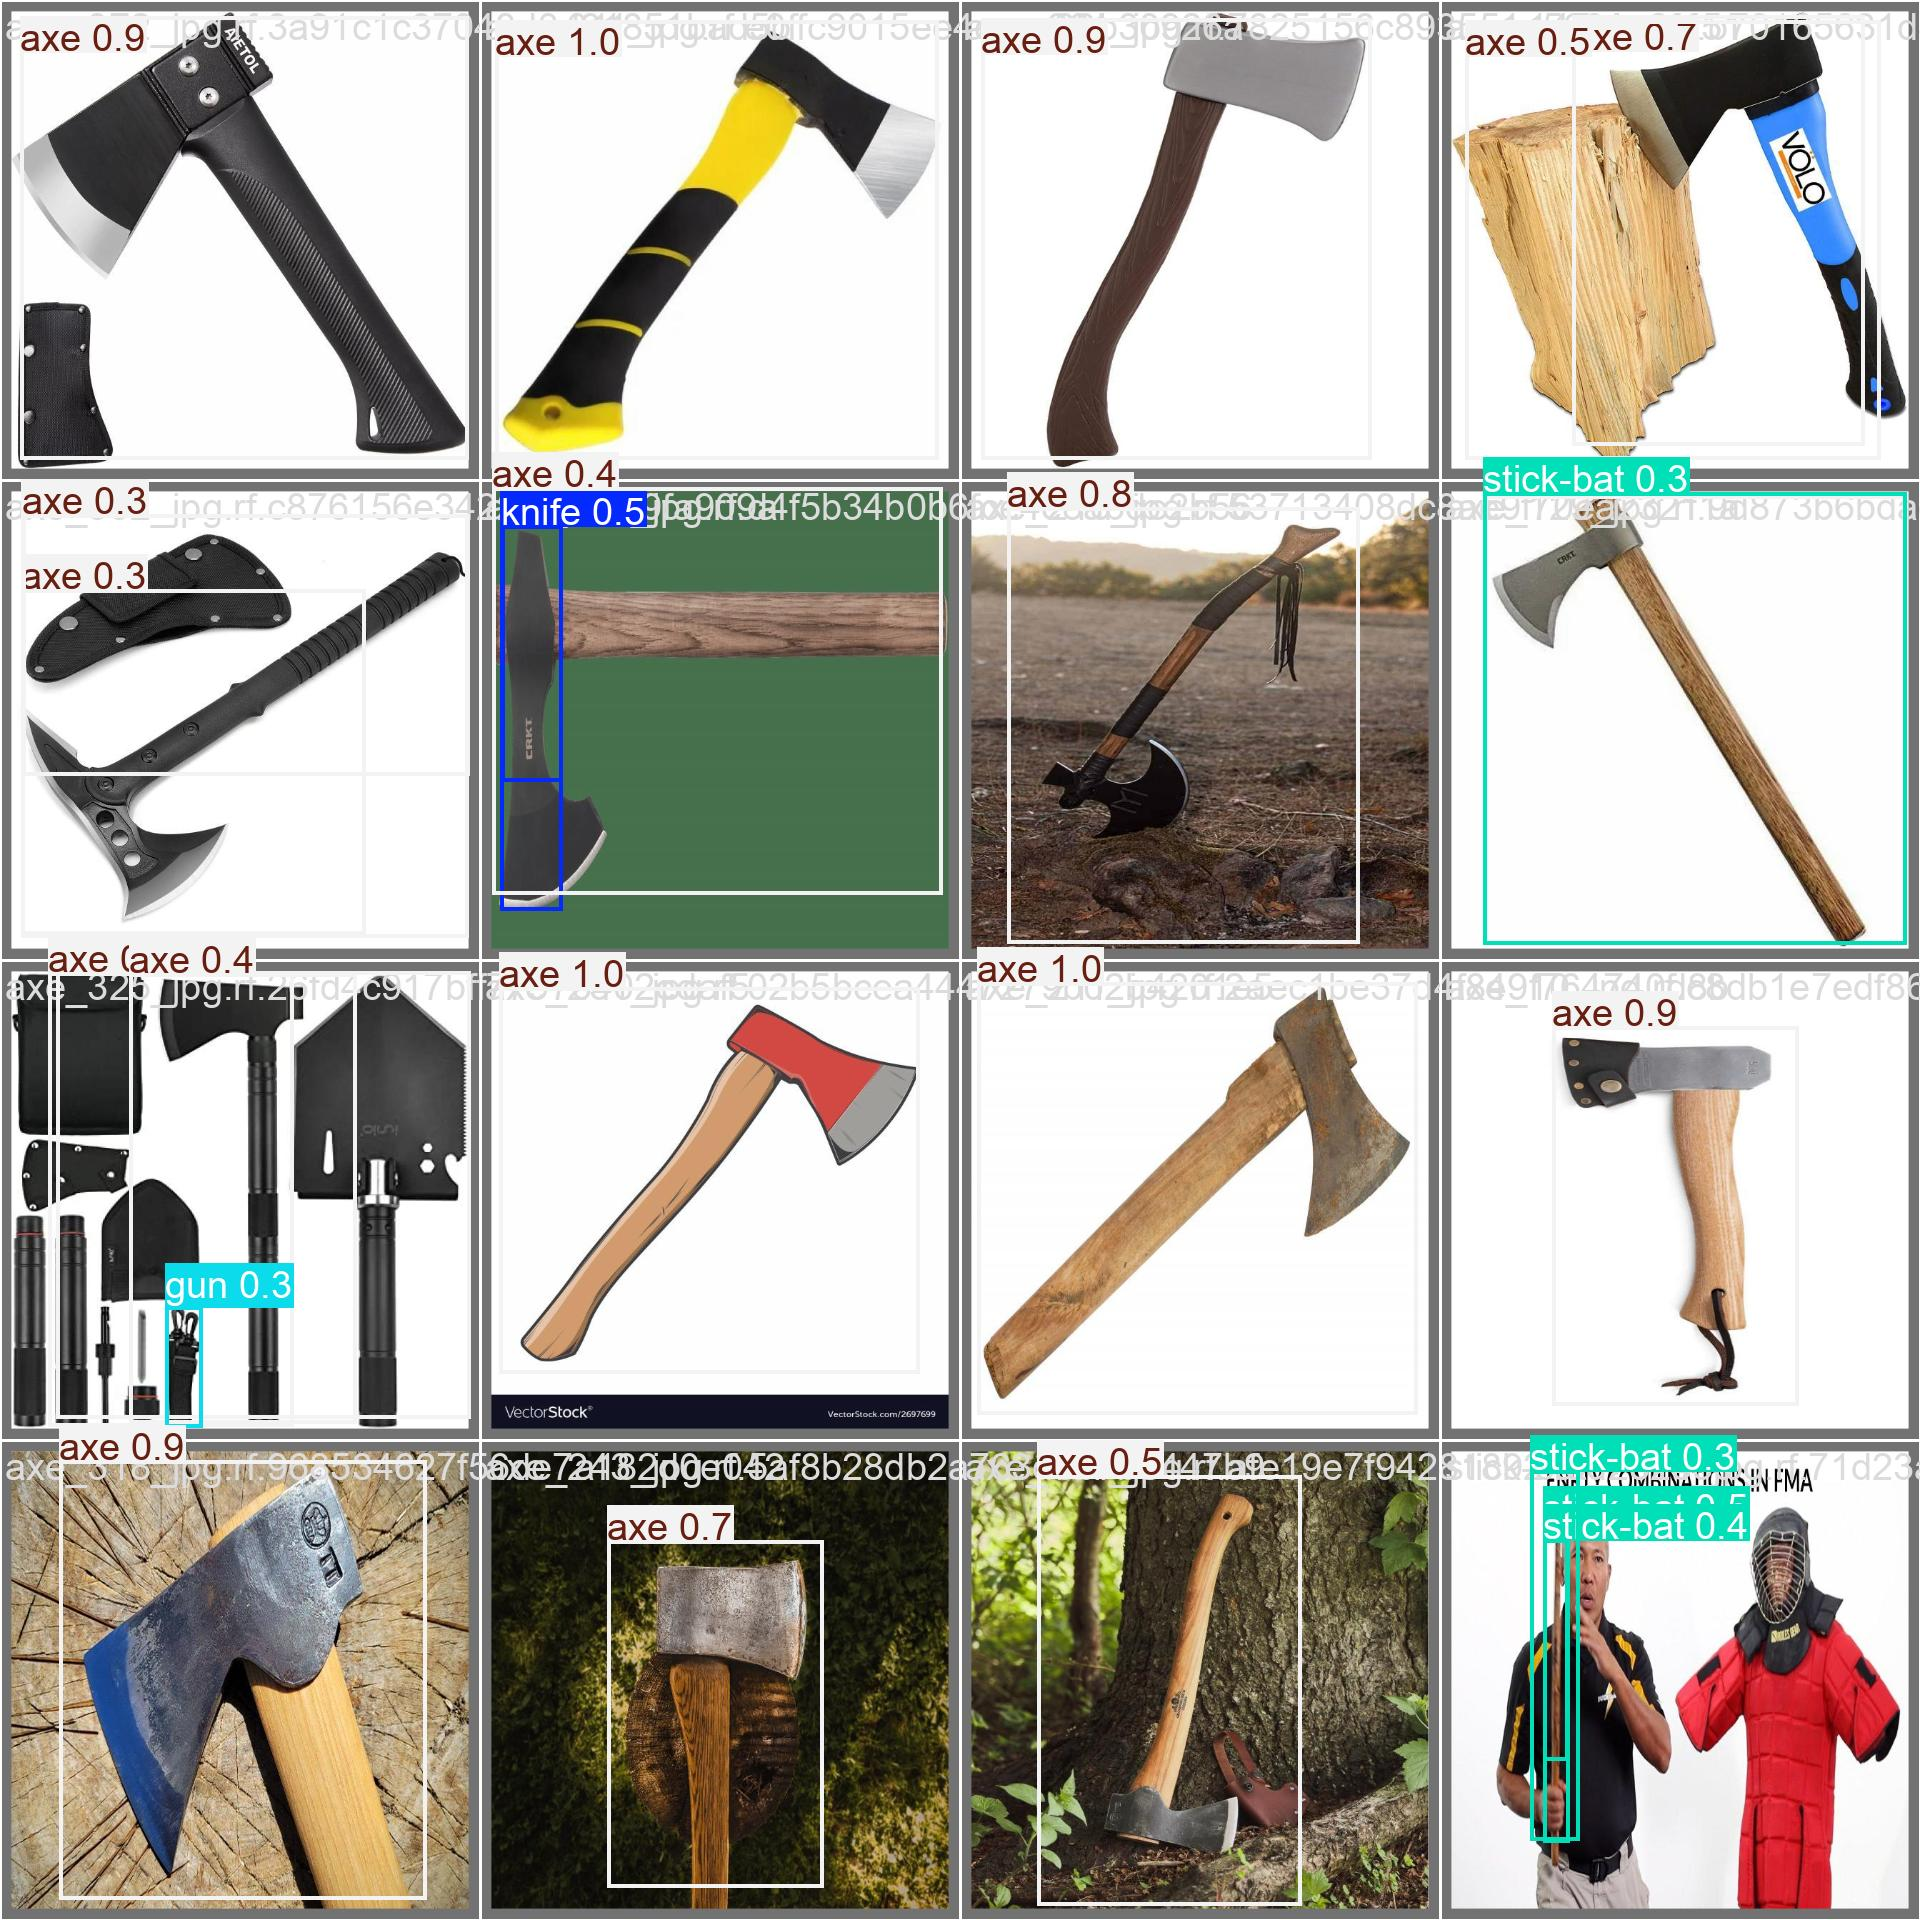

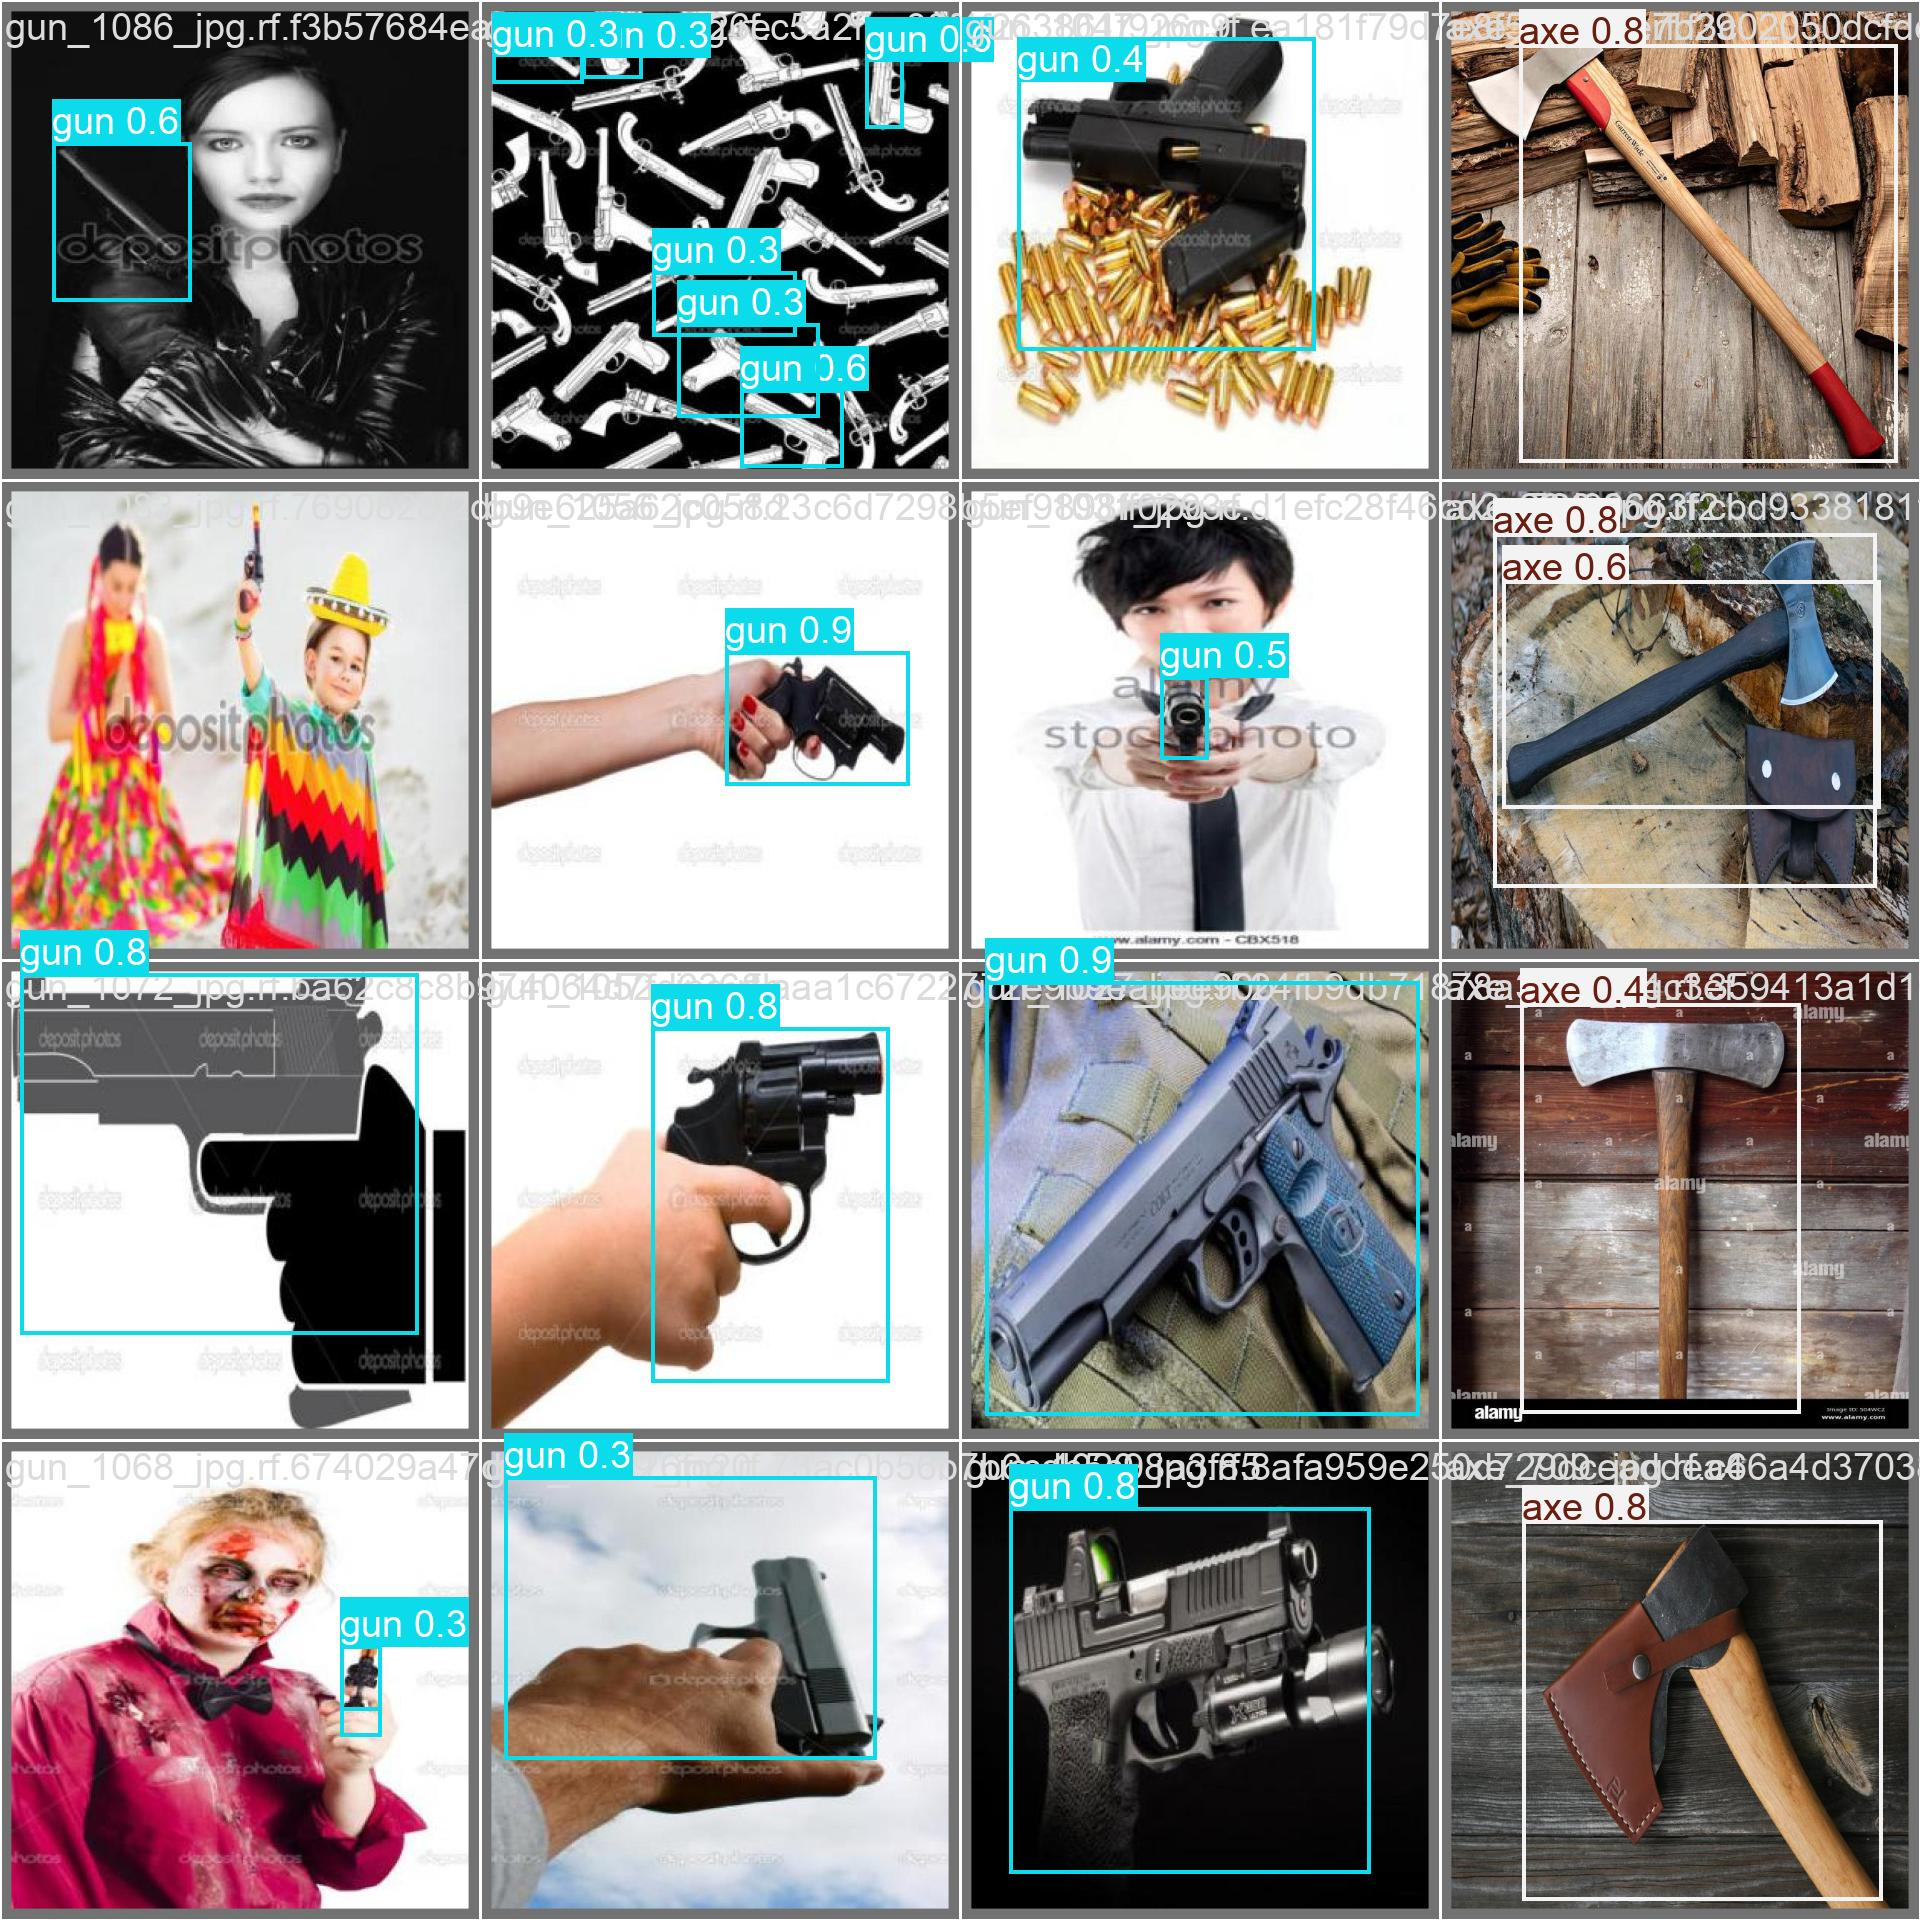

In [ ]:
display(Image(filename='runs/detect/val/val_batch0_pred.jpg'))
display(Image(filename='runs/detect/val/val_batch1_pred.jpg'))
display(Image(filename='runs/detect/val/val_batch2_pred.jpg'))


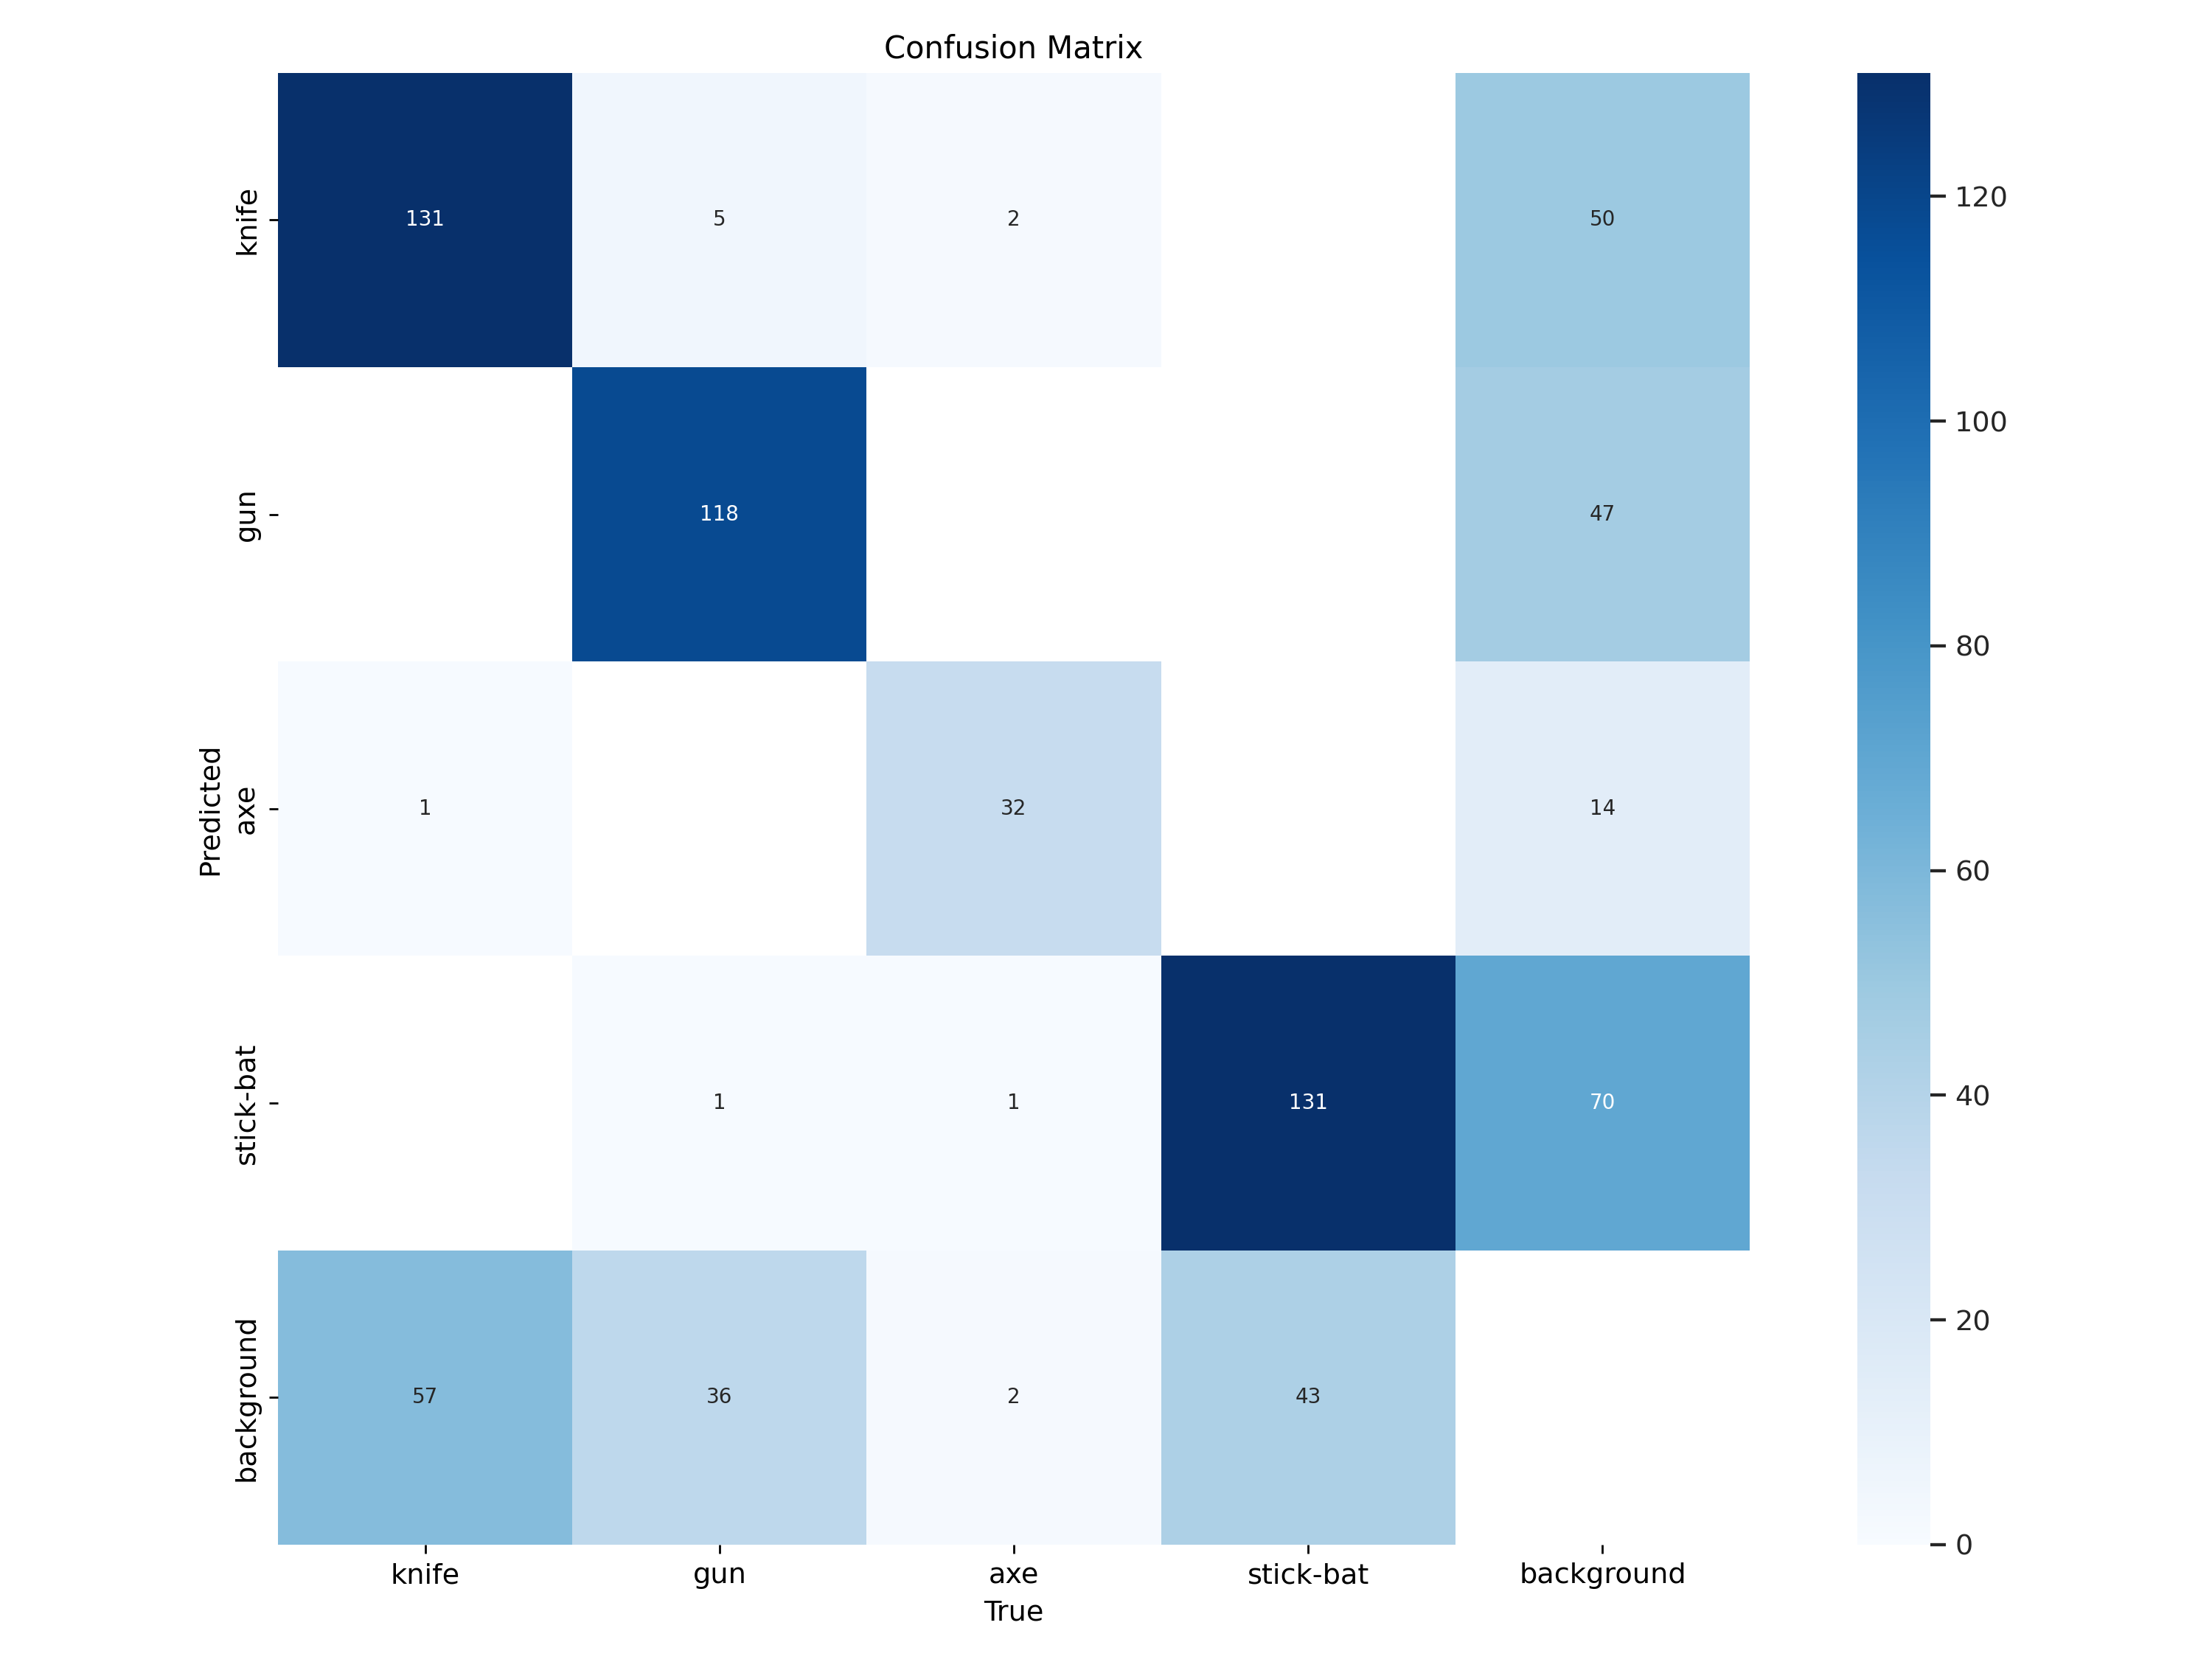

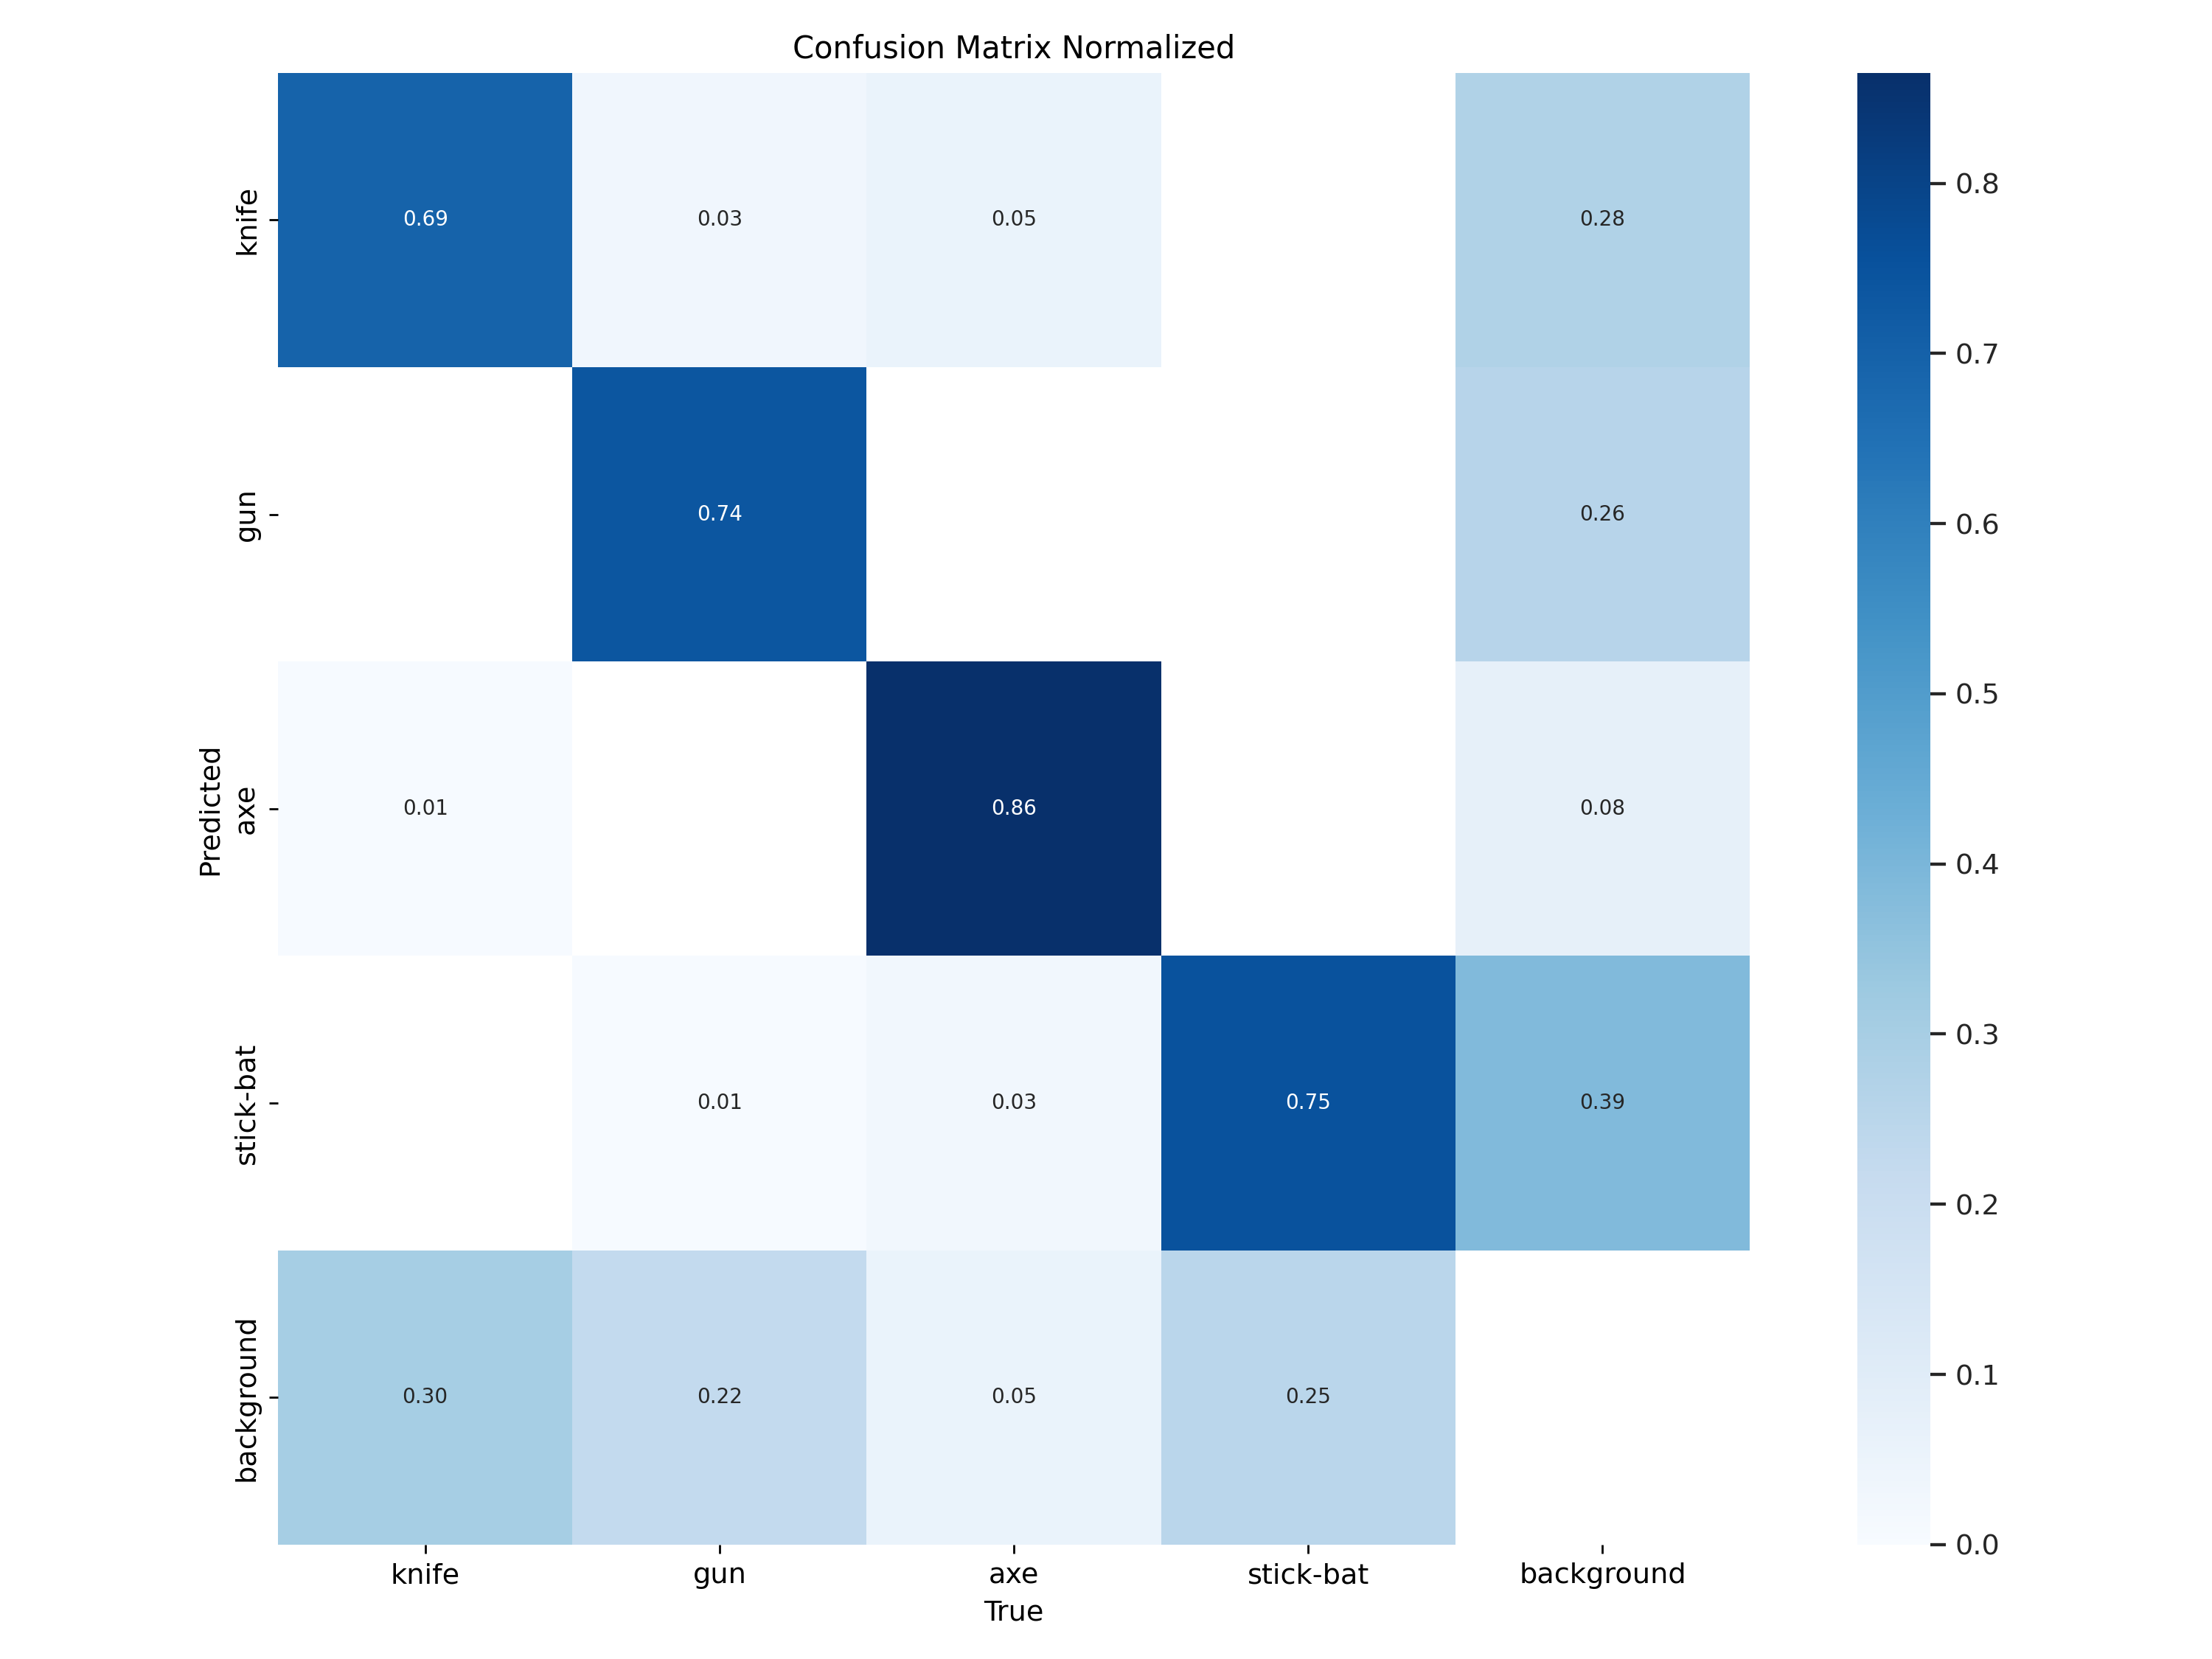

In [ ]:
display(Image(filename='runs/detect/val/confusion_matrix.png'))
display(Image(filename='runs/detect/val/confusion_matrix_normalized.png'))
